# Garments Project (by: The Guo Family)

Garmets are worn every day by humans around the world. From the famous and highly sought after fashion houses such as the Haus of Gucci, Louis Vitton, Dior, down to the smaller fashion labels, humans have the tendency to buy what is on the shelf. But, behind all the garments that are sold on a day to day basis, what goes behind the scenes? In this project, we want to look at the reasoning between the overtime that happens in this current fashion house together with making three (3) models to predict the number of overtime that will happen in the future.

## Dataset Introduction

The Dataset on Garments brings in a full image of the garment manufacturing sector, emphasizing the productivity performance of employees. It is the most labor-intensive industry, requiring maximum efficiency and timely completion of work. This dataset is an effective way to understand the different effects on team productivity in garment manufacturing companies.

## Collection and Validation

The collection of information was done manually to ensure the data collection's relevancy and accuracy for application in productivity analysis. This dataset includes many attributes concerning production performance, such as team size, overtime hours, and interruptions, which are critical for knowledge-based decisions relevant to factory management.

## Target Task

This dataset analyzes and predicts overtime hours (that is, the over_time column data). Such predictions are generally associated with overtime causative variables- team size, WIP, interruption in the production process, etc. By developing glory models representing overtime hours, the dataset would be a decision support tool for garment industry production scheduling and workforce utilization management.

In [64]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import missingno as msno
from sklearn.preprocessing import MinMaxScaler
import os

In [65]:
df = pd.read_csv('garments.csv') # Importing garments.csv file to a pandas dataframe

After importing the dataset into the dataframe, we now look for errors and see what can we do for null cells.

In [66]:
# Dataset structure
print(df.info())  # Column names, data types, and non-null counts
print(df.describe())  # Statistics for numeric columns
print(df.head())  # Preview the first few rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

We see that there are null values in the WIP column, highlighted in the figure below:

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64


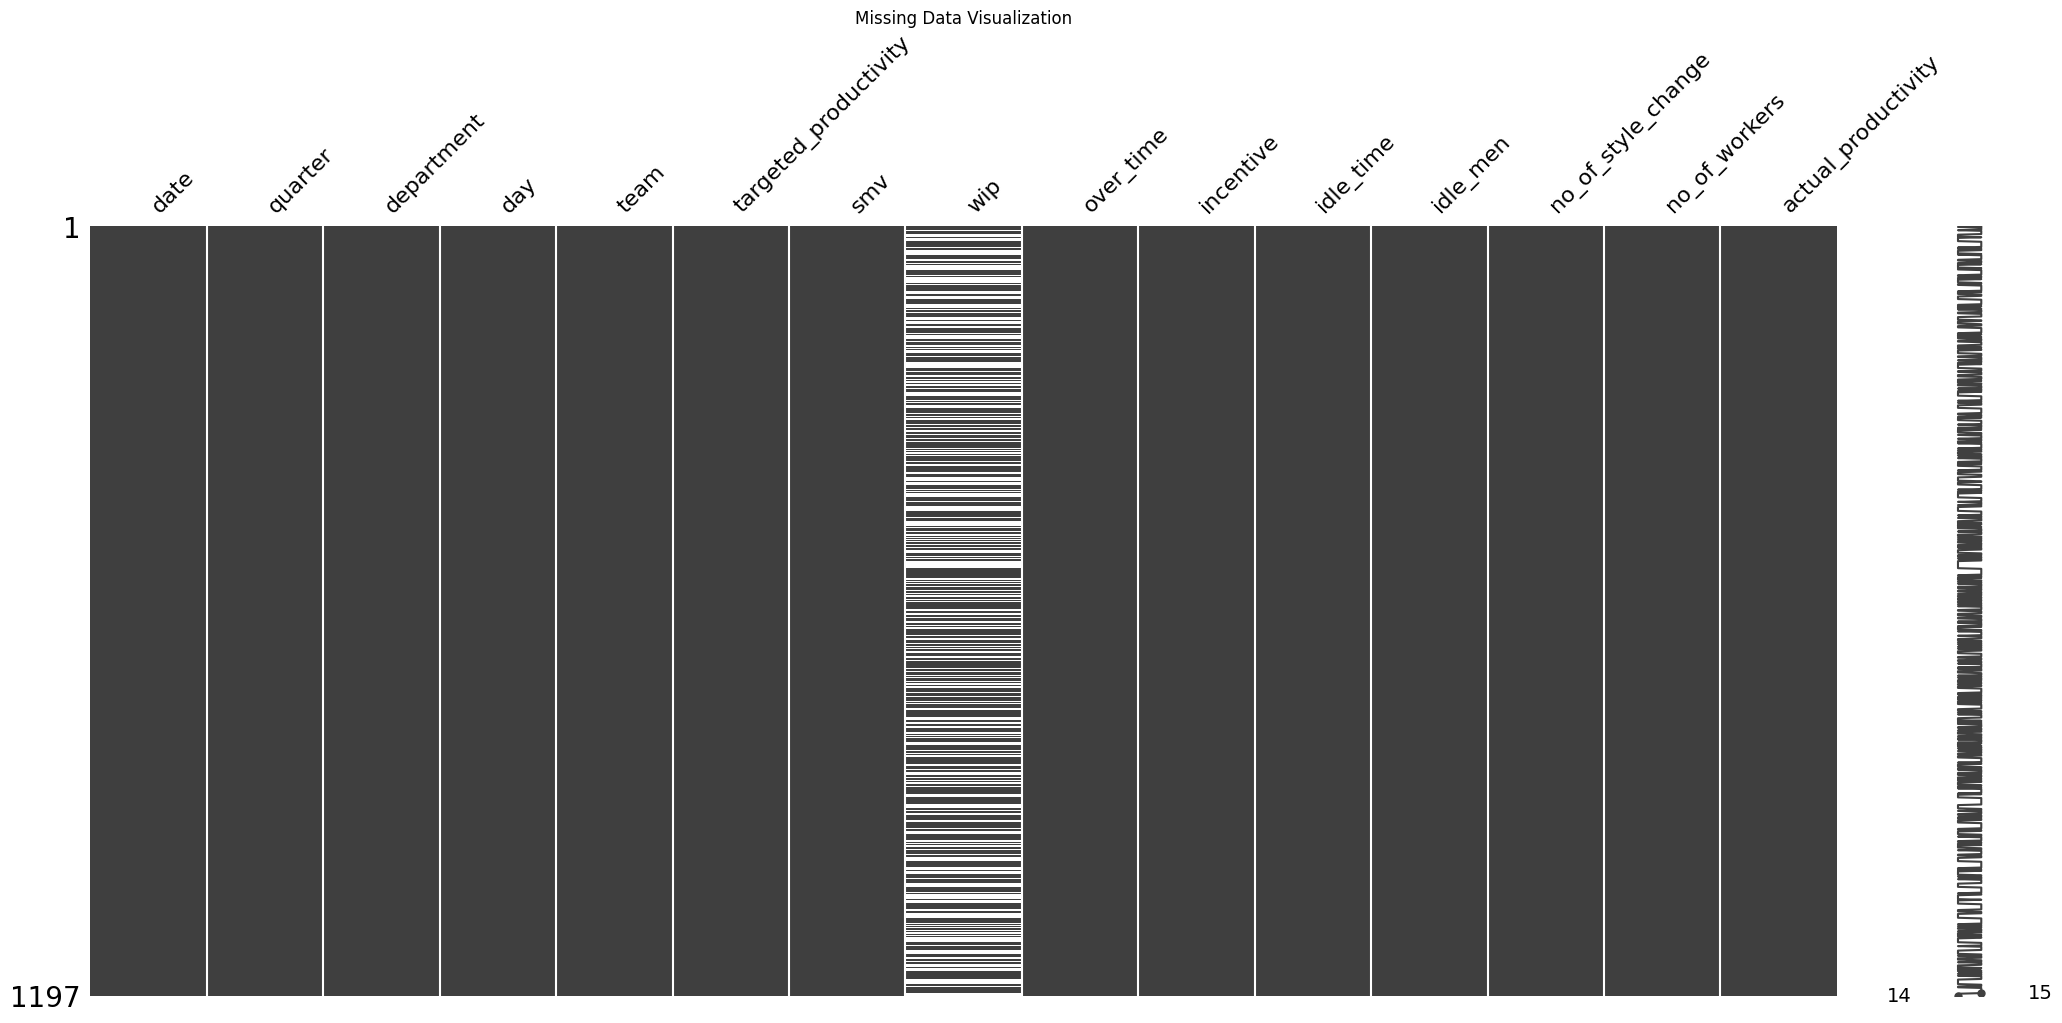

In [67]:
# Count missing values per column
print(df.isnull().sum())

# Visualize missing data
msno.matrix(df)
plt.title('Missing Data Visualization')
plt.show()

The team chose to replace empty cells with zero. This is doable since WIP stands for "work in progress" if the cell is null, it means that there are no projects that are "work in progress", making them null.

In [68]:
# Replace NaN values with 0
df = df.fillna(0)

# Replace empty strings with 0
df = df.replace('', 0)

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64


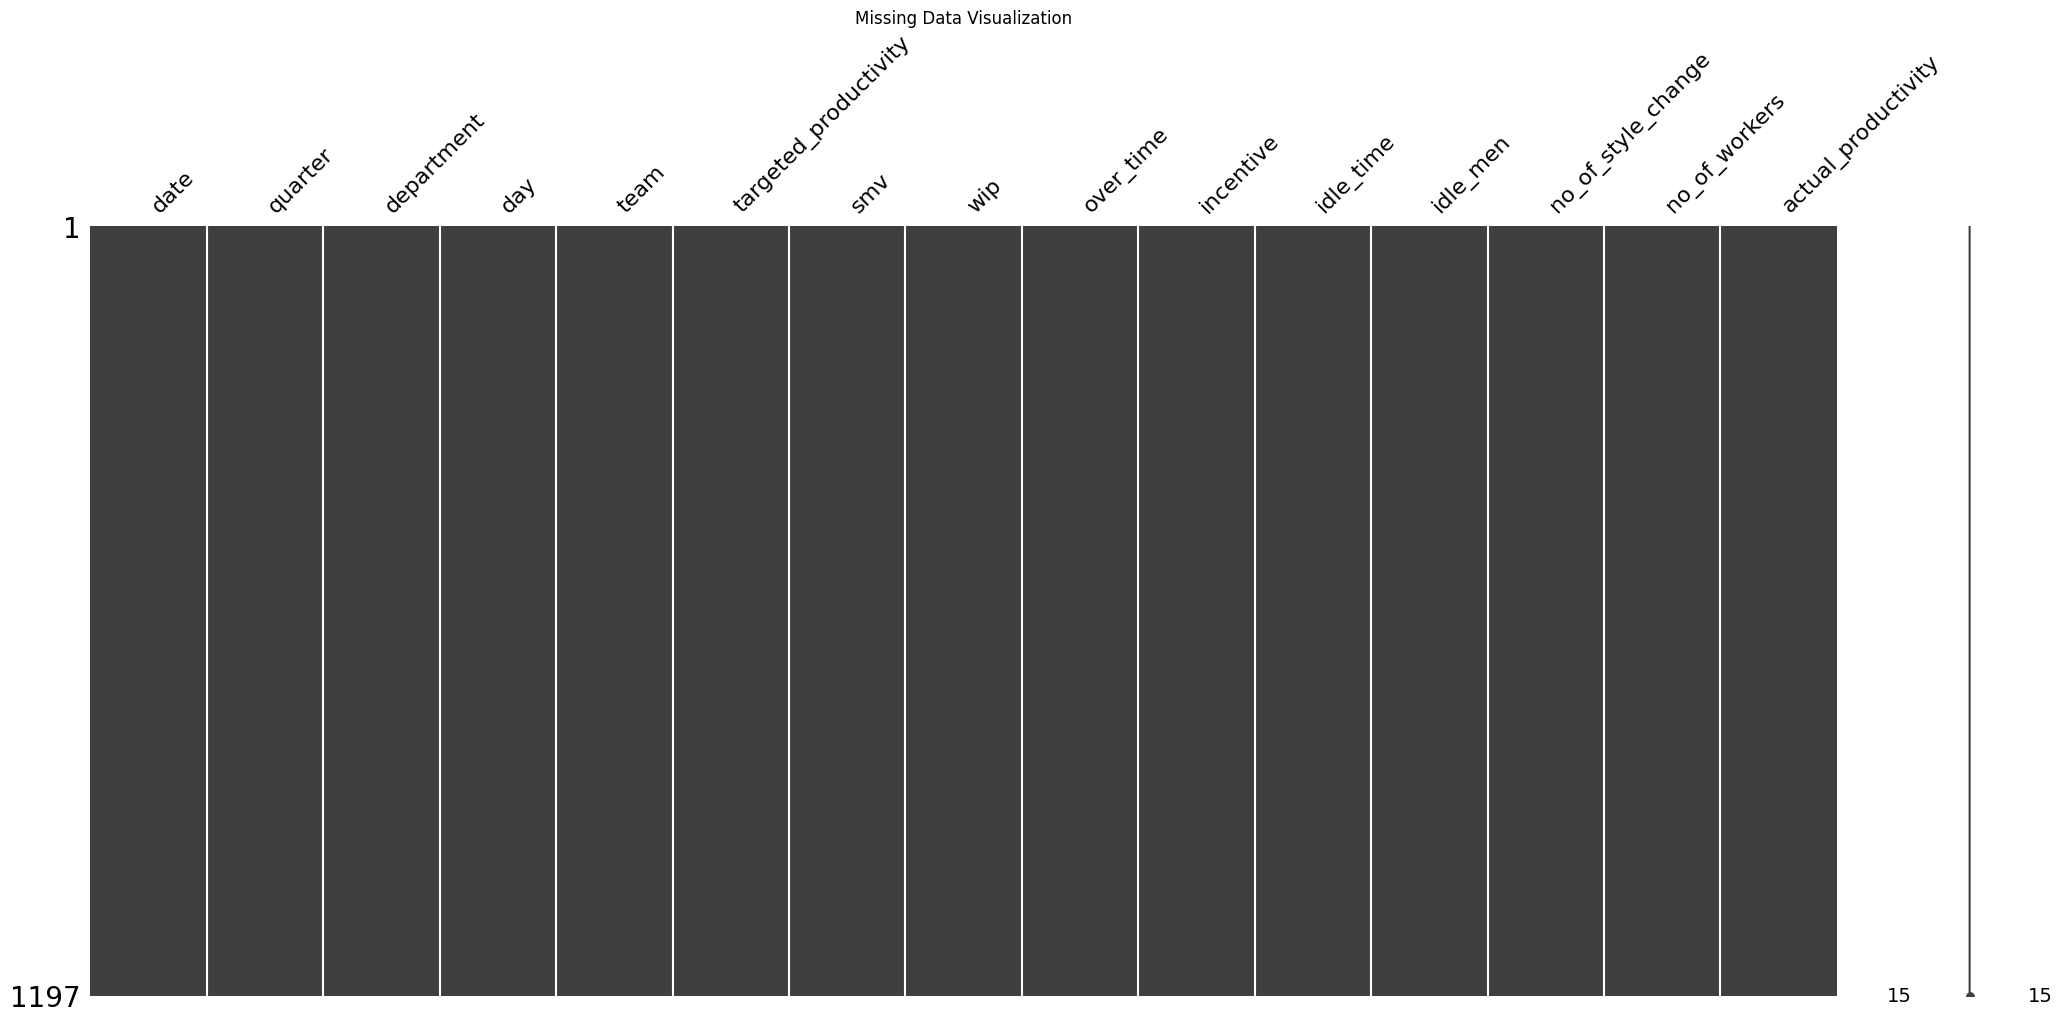

In [69]:
# Count missing values per column
print(df.isnull().sum())

# Visualize missing data
msno.matrix(df)
plt.title('Missing Data Visualization')
plt.show()

Here we're making sure that the dataset does not have any more null cells.

Afterwards, we normalize the values to make sure that all numerical features have the same impact on the model.

In [70]:
over_time = df['over_time']

true_numeric_columns = ['over_time', 'smv', 'wip', 'incentive', 'idle_time', 'idle_men', 
                        'no_of_style_change', 'no_of_workers']
numeric_columns = df[true_numeric_columns]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the numeric columns and update the DataFrame
df[numeric_columns.columns] = scaler.fit_transform(numeric_columns)
df['unscalled_over_time'] = over_time

After normalizing the values, we move on to adding some columns to help with parsing through data.

In [71]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['month'] = df['date'].dt.month  # Extract the month

We also have to change the finishing with the space to finishing

In [72]:
#Small Cleaning
finish = ["finishing ", "finishing"]
df.loc[df.department.isin(finish), "department"] = 'finishing'

Finally, we move on to looking at the data itself and see what does it mean to this certain fashion haus.

# Exploring the data

Firstly, we look at the distribution of each numerical data and see what it means to the data itself.

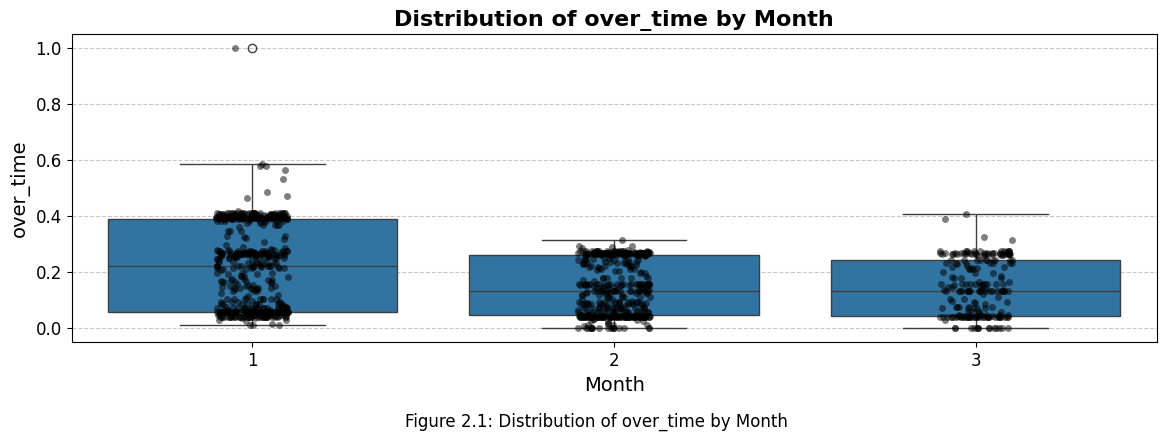

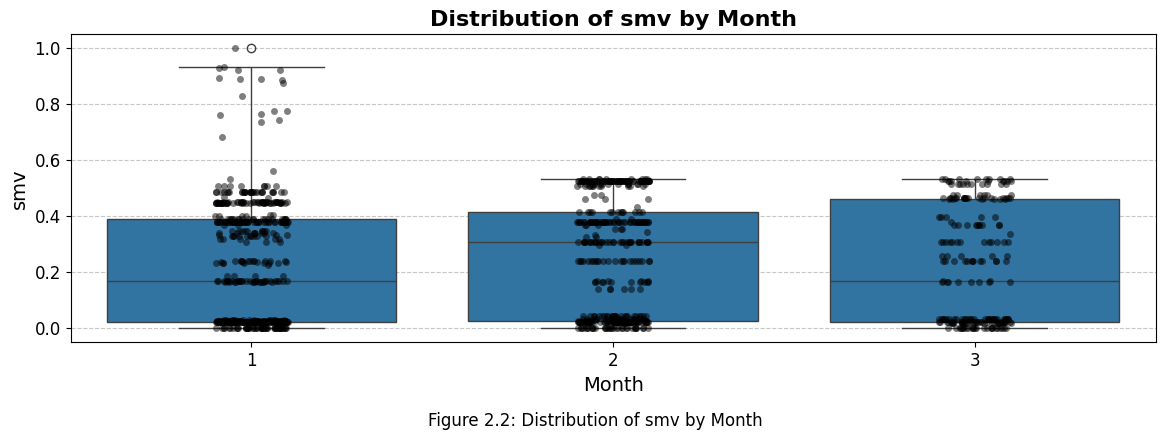

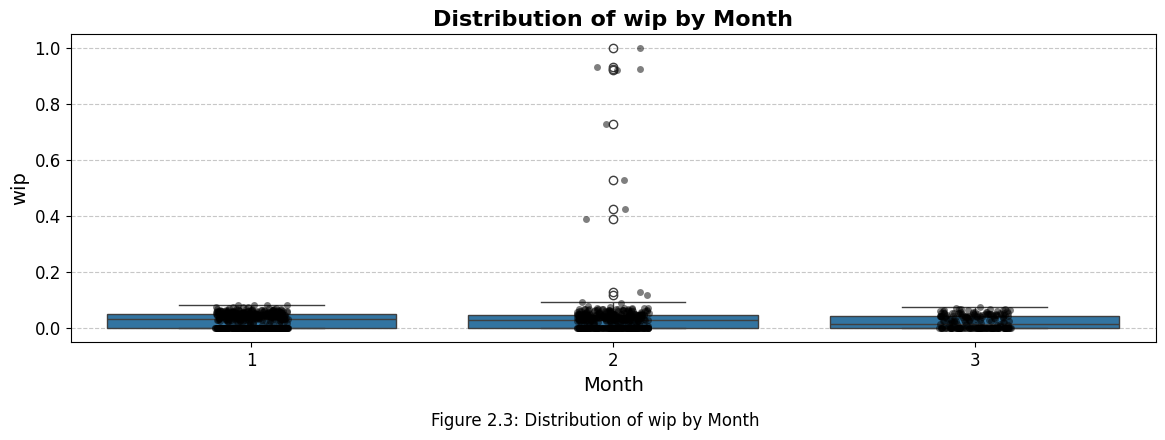

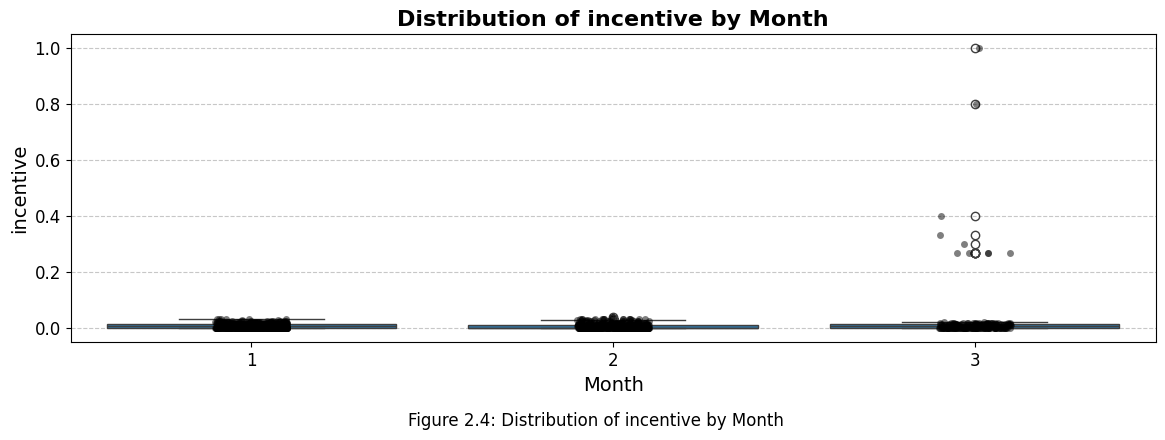

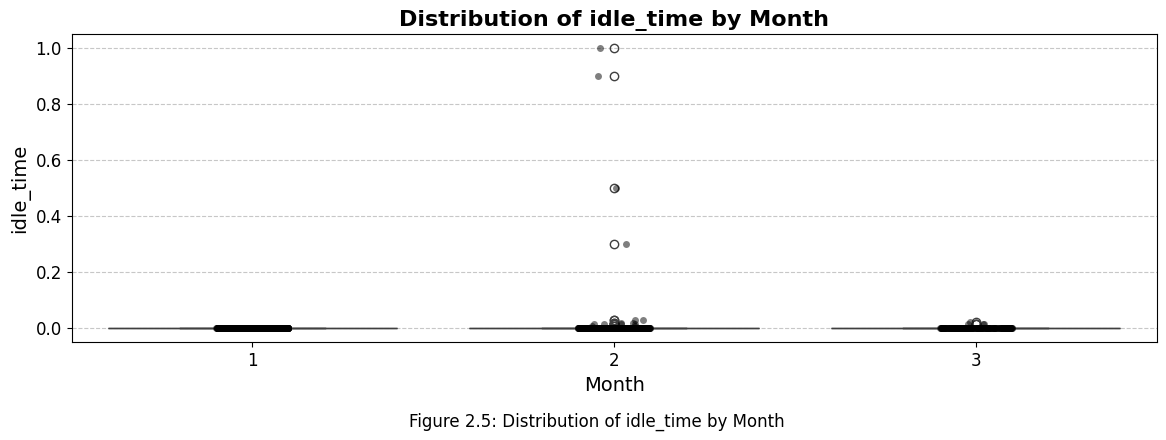

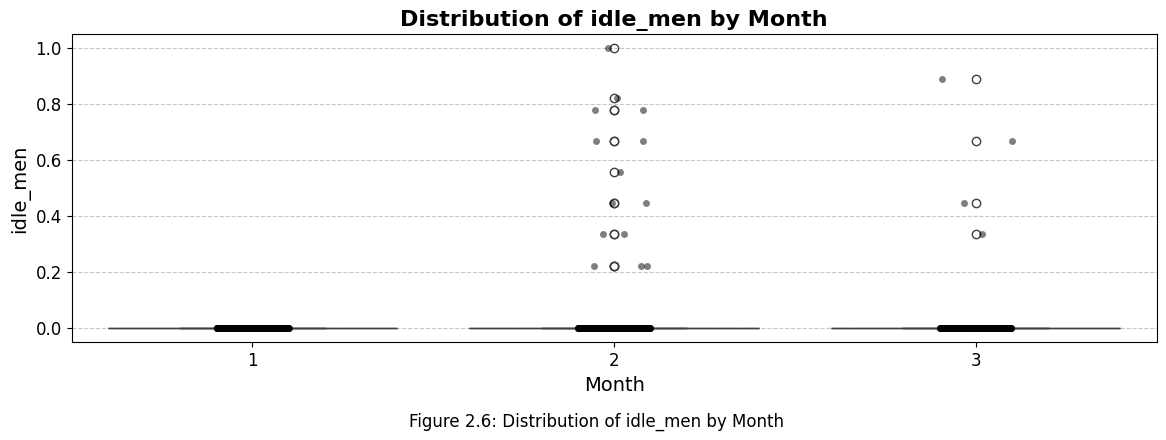

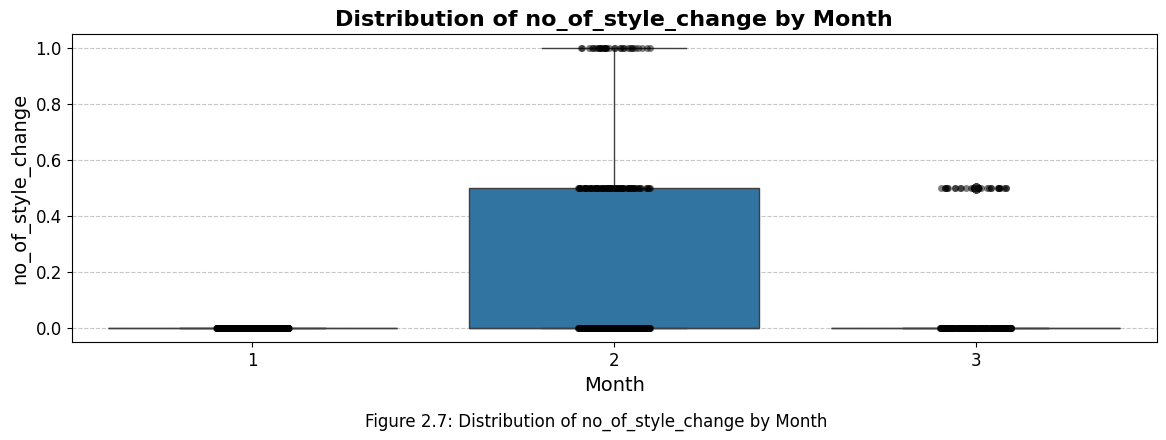

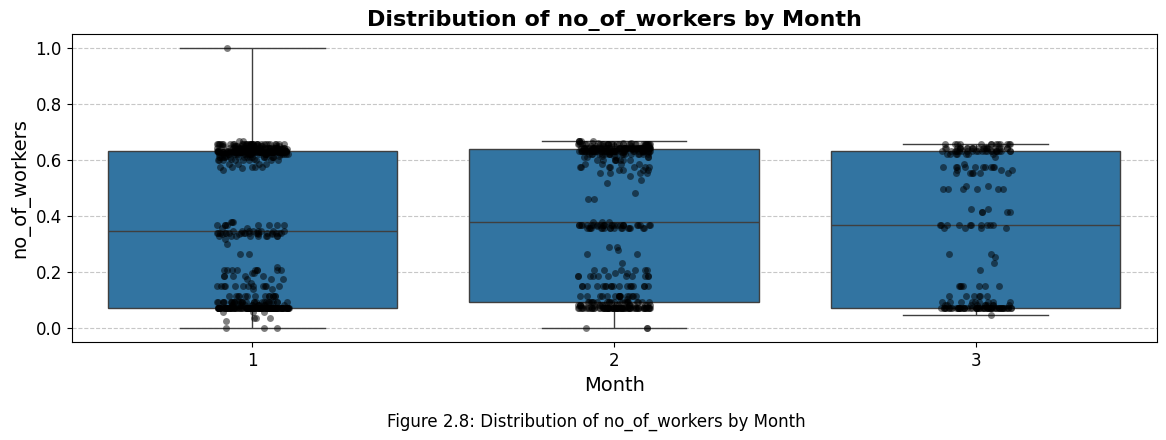

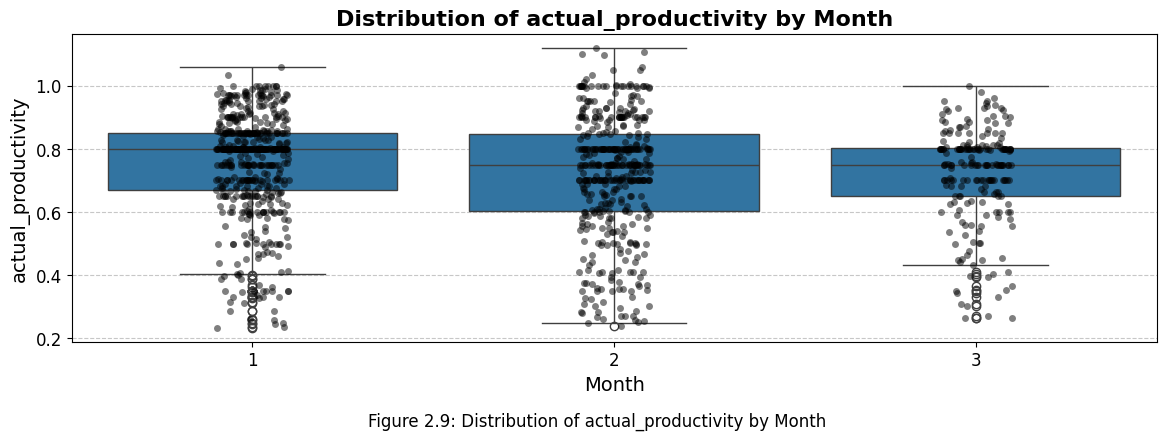

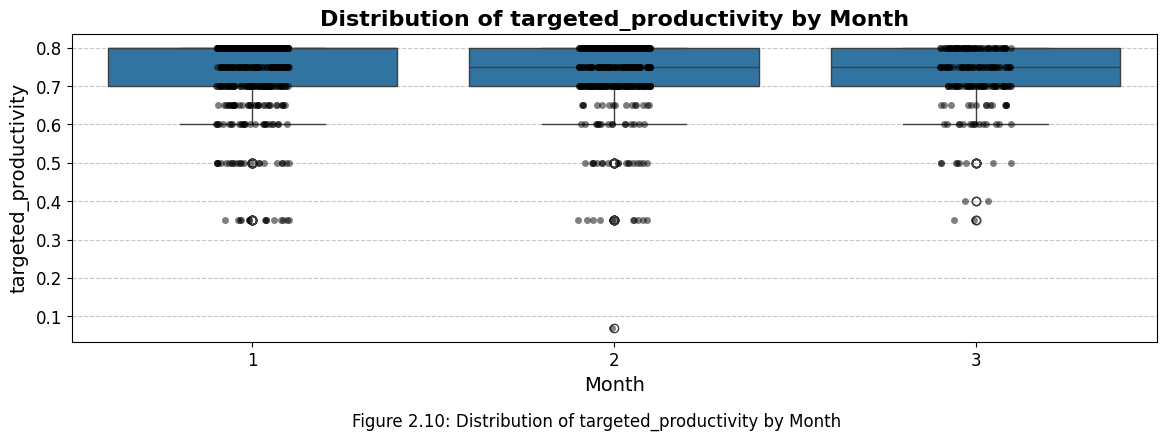

In [73]:
true_numeric_columns = ['over_time', 'smv', 'wip', 'incentive', 'idle_time', 'idle_men',
                        'no_of_style_change', 'no_of_workers', 'actual_productivity', 'targeted_productivity']

# Ensure output directory exists
output_dir = "figures"
os.makedirs(output_dir, exist_ok=True)

# Starting figure number
figure_number = 2.1

# Starting figure number
major_figure_number = 2  # Represents the major part (e.g., 2.x)
minor_figure_number = 1  # Represents the minor part (e.g., x.1)

# Visualize distributions of numeric columns
for col in true_numeric_columns:
    figure_number = f"{major_figure_number}.{minor_figure_number}" # Combine major and minor figure numbers for the filename
    plt.figure(figsize=(14, 4))  # Adjust figure size
    sns.boxplot(x='month', y=col, data=df, showfliers=True)  # Boxplot
    sns.stripplot(x='month', y=col, data=df, color='black', alpha=0.5, jitter=0.1, dodge=False)  # Reduced jitter
    plt.title(f'Distribution of {col} by Month', fontsize=16, fontweight='bold')  # Title
    plt.xlabel('Month', fontsize=14)
    plt.ylabel(col, fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a grid for better readability
    plt.figtext(0.5, -0.1, f"Figure {figure_number}: Distribution of {col} by Month", ha='center', fontsize=12) # Add figure label as a caption


    figure_filename = os.path.join(output_dir, f"Figure_{figure_number}.png")
    plt.savefig(figure_filename, bbox_inches='tight')

    # Increment the minor figure number
    minor_figure_number += 1

    plt.show()


As shown in Figure 2.1, it shows the distribution of over time per month. The chart shows different patterns in overtime hours over three months. In Month 1, the median overtime is higher and more varied than in Months 2 and 3. This might mean there's a seasonal pattern, like a busy time with more work or production, possibly due to certain needs or deadlines. Also, some extreme values in Month 1, almost reaching the highest possible overtime of 1.0, could be due to unusual events, like sudden staff shortages or urgent project needs, causing some workers or days to have much higher overtime.

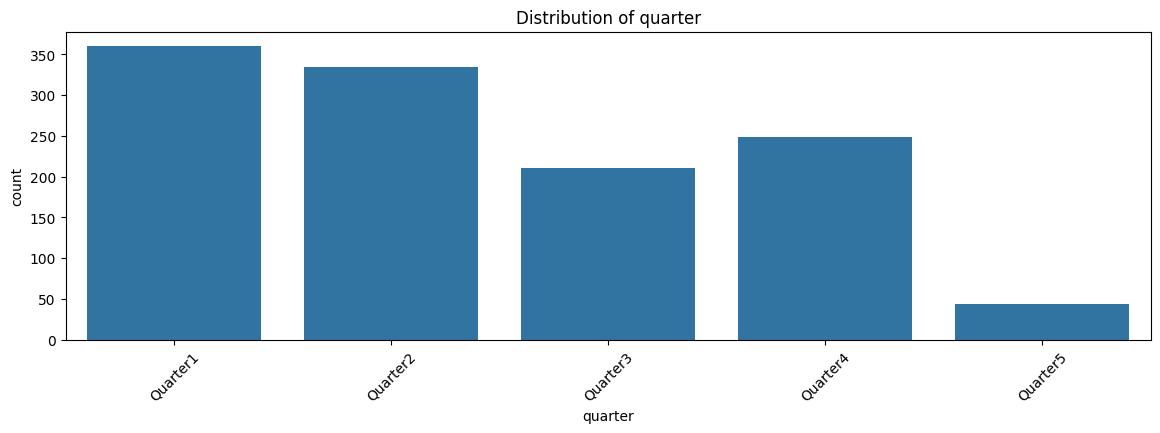

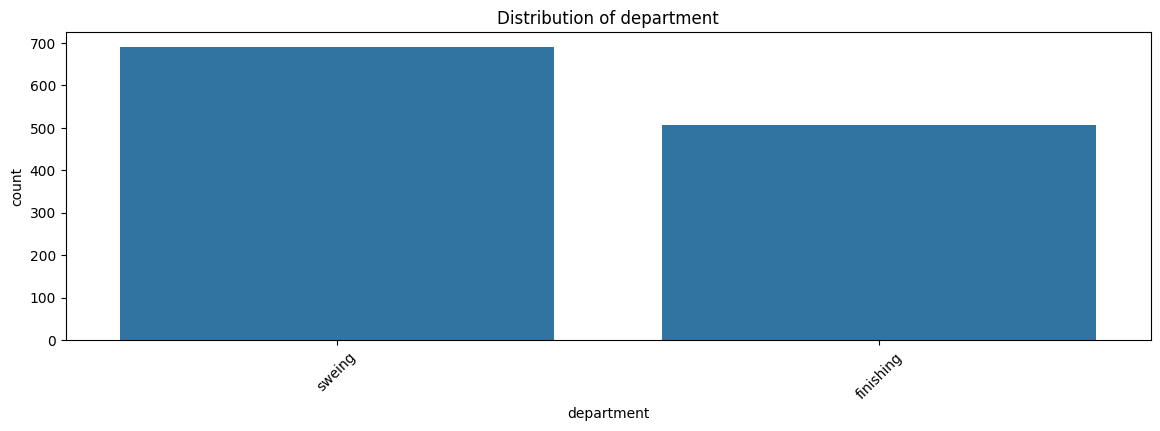

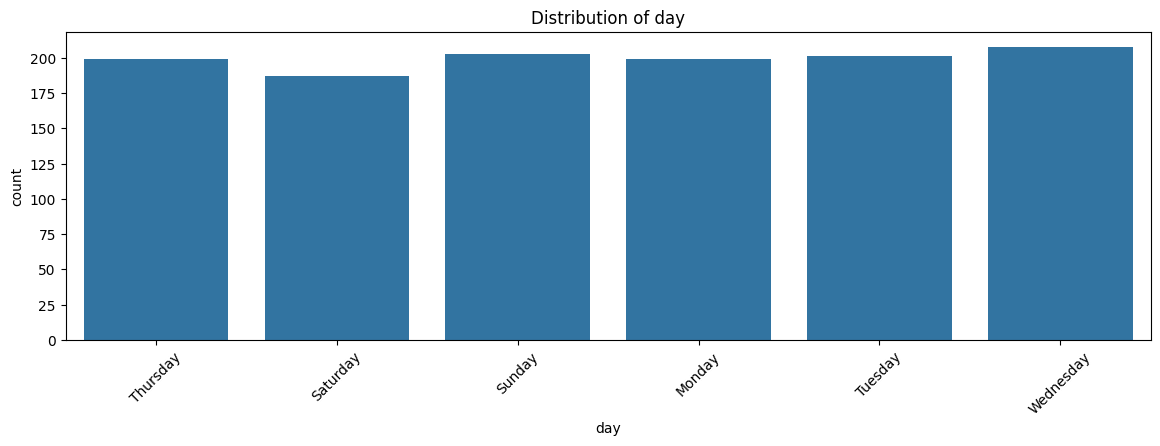

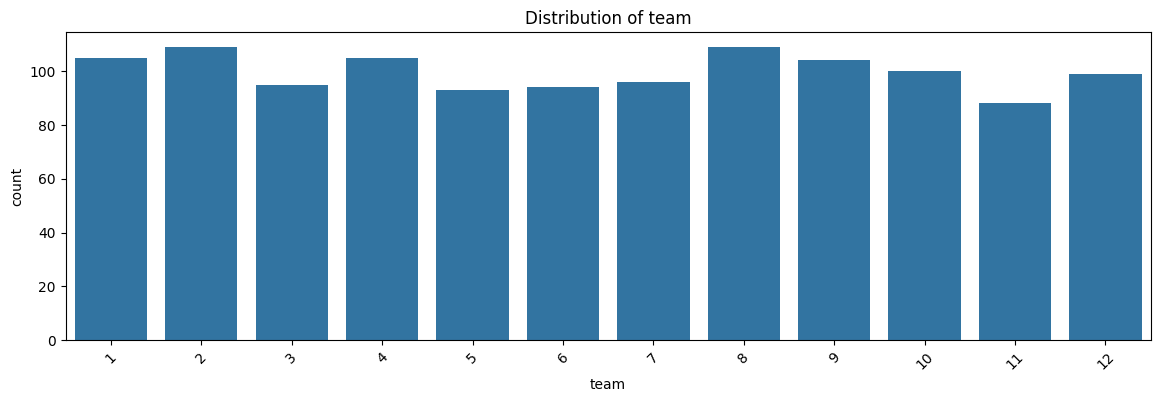

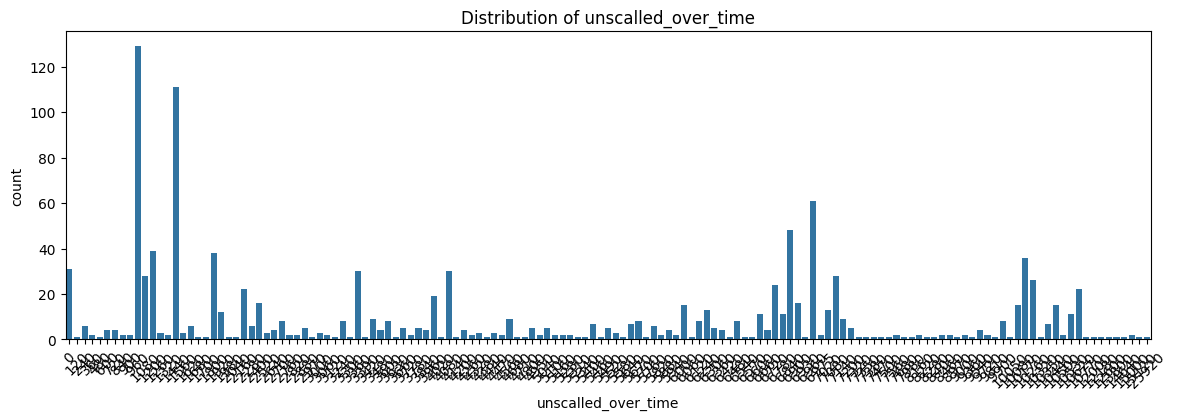

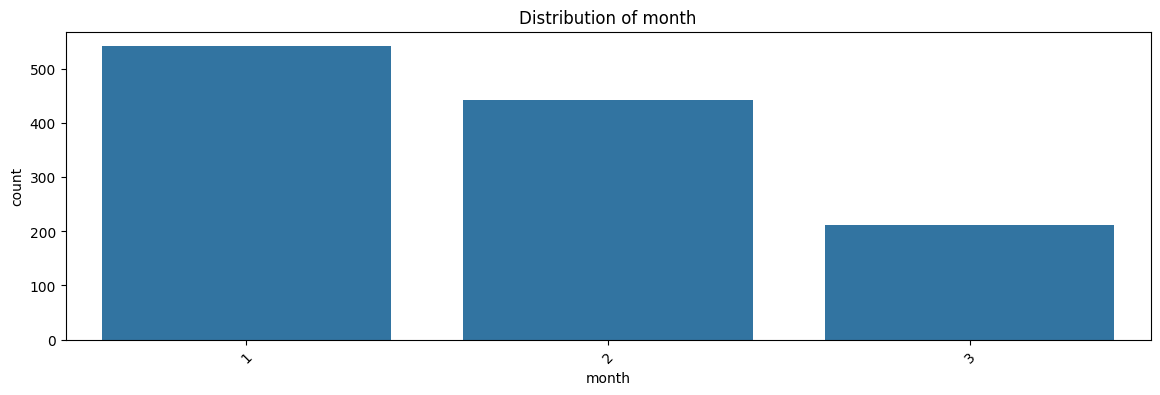

In [74]:
# Create a list of columns excluding the true numeric ones
remaining_columns = [col for col in df.columns if col not in true_numeric_columns and col != 'date']

# Filter the remaining categorical columns (assuming they're not numeric)
categorical_columns = df[remaining_columns]

# Check unique values and distributions for the remaining categorical features
for col in categorical_columns:
    plt.figure(figsize=(14, 4))  # Width: 14 inches, Height: 8 inches
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

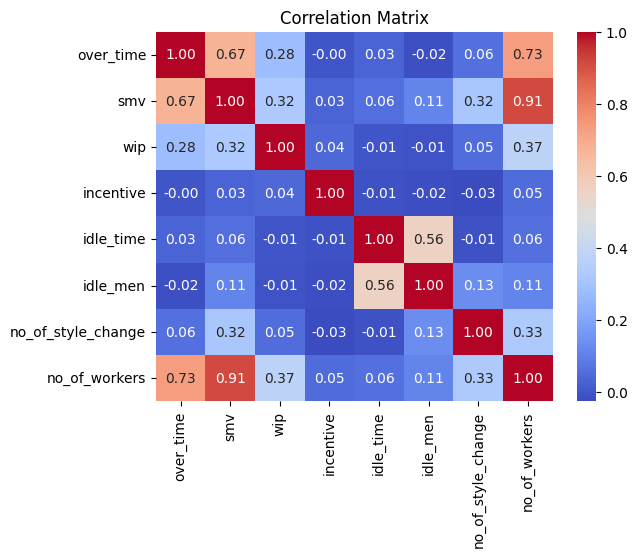

Correlation with Overtime:
 over_time             1.000000
no_of_workers         0.734164
smv                   0.674887
wip                   0.276529
no_of_style_change    0.059790
idle_time             0.031038
incentive            -0.004793
idle_men             -0.017913
Name: over_time, dtype: float64


In [75]:
# Correlation matrix
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Correlations with 'over_time'
correlation_with_overtime = numeric_columns.corr()['over_time'].sort_values(ascending=False)
print("Correlation with Overtime:\n", correlation_with_overtime)


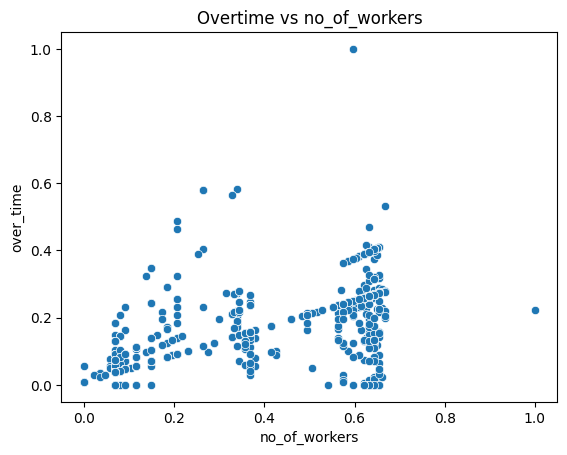

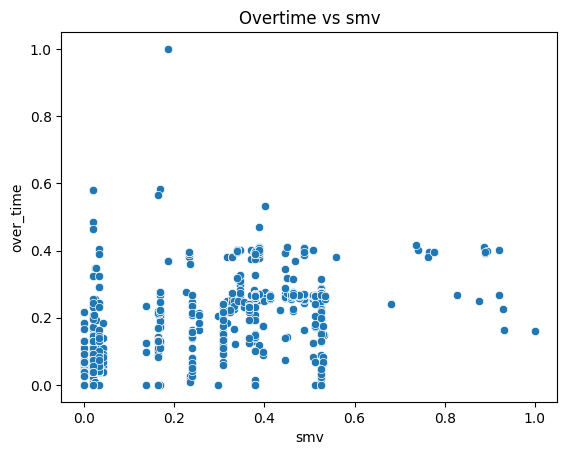

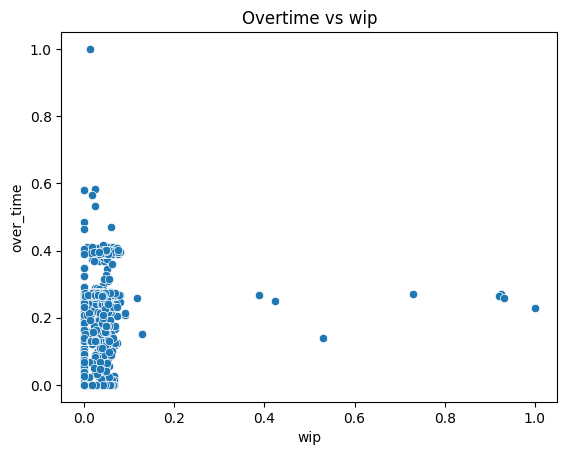

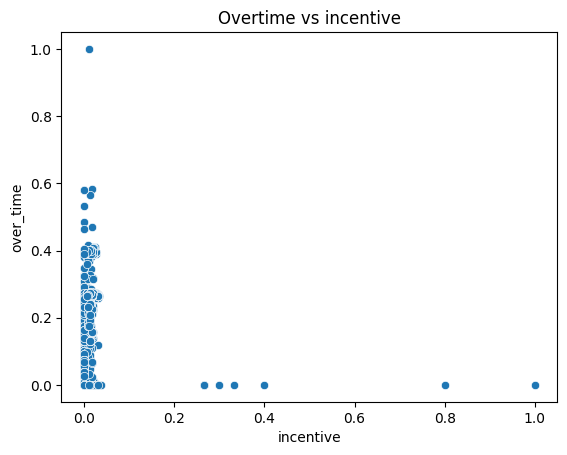

In [76]:
# Scatterplots for numeric columns
for col in ['no_of_workers', 'smv', 'wip', 'incentive']:
    sns.scatterplot(x=col, y='over_time', data=df)
    plt.title(f'Overtime vs {col}')
    plt.show()


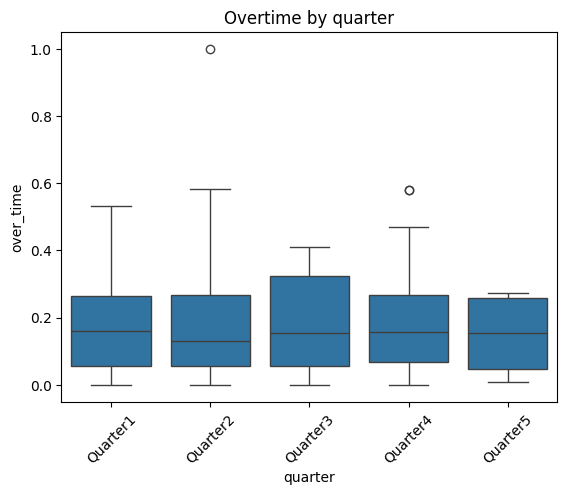

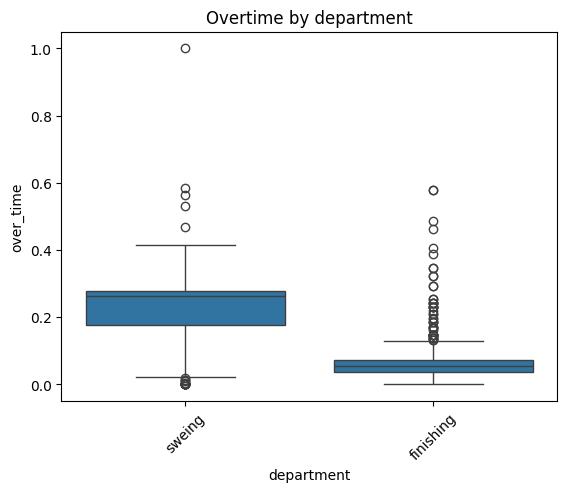

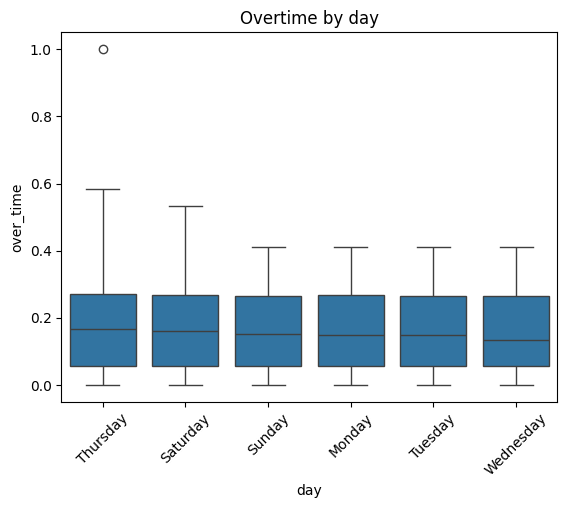

In [77]:
# Boxplots for categorical features
for col in ['quarter', 'department', 'day']:
    sns.boxplot(x=col, y='over_time', data=df)
    plt.title(f'Overtime by {col}')
    plt.xticks(rotation=45)
    plt.show()


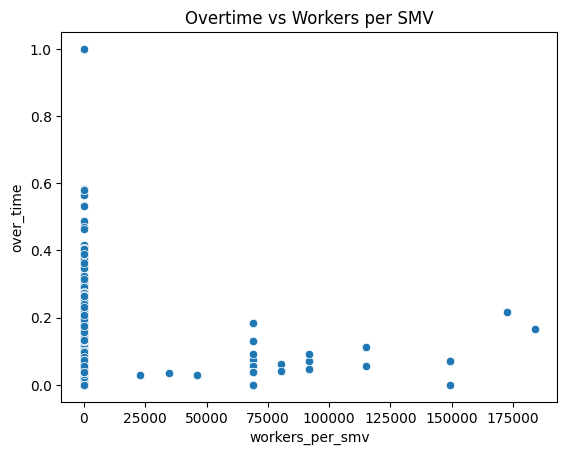

         over_time           targeted_productivity actual_productivity
              mean       std                  mean                mean
quarter                                                               
Quarter1  0.172875  0.111714              0.744083            0.751560
Quarter2  0.168018  0.140886              0.732090            0.743710
Quarter3  0.188889  0.140572              0.721190            0.704759
Quarter4  0.187162  0.129010              0.714516            0.709067
Quarter5  0.143729  0.105291              0.718182            0.826177


In [78]:
# Interaction terms (e.g., workers_per_smv)
df['workers_per_smv'] = df['no_of_workers'] / (df['smv'] + 1e-6)
sns.scatterplot(x='workers_per_smv', y='over_time', data=df)
plt.title('Overtime vs Workers per SMV')
plt.show()

# Group-Wise Analysis
grouped = df.groupby('quarter').agg({
    'over_time': ['mean', 'std'],
    'targeted_productivity': ['mean'],
    'actual_productivity': ['mean']
})
print(grouped)


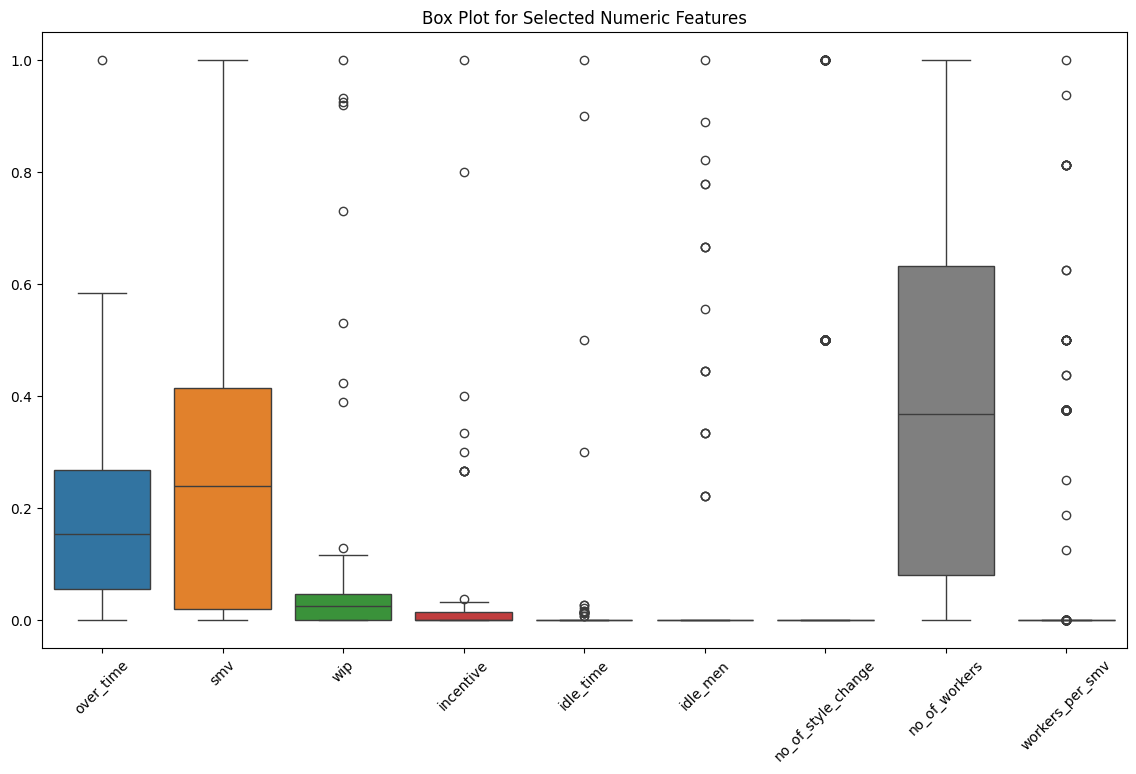

Outliers:
           date   quarter department       day  team  targeted_productivity  \
138 2015-01-08  Quarter2     sweing  Thursday    12                   0.80   
139 2015-01-08  Quarter2     sweing  Thursday     6                   0.80   
146 2015-01-08  Quarter2     sweing  Thursday    11                   0.35   
383 2015-01-22  Quarter4  finishing  Thursday     1                   0.70   
384 2015-01-22  Quarter4  finishing  Thursday     2                   0.70   

          smv       wip  over_time  incentive  idle_time  idle_men  \
138  0.168602  0.023700   0.583333   0.017500        0.0       0.0   
139  0.164731  0.017775   0.564815   0.013889        0.0       0.0   
146  0.186218  0.012412   1.000000   0.010556        0.0       0.0   
383  0.020132  0.000000   0.578704   0.000000        0.0       0.0   
384  0.020132  0.000000   0.578704   0.000000        0.0       0.0   

     no_of_style_change  no_of_workers  actual_productivity  \
138                 0.0       0.3390

In [79]:
# Normalize the 'workers_per_smv' column
df['workers_per_smv'] = scaler.fit_transform(df[['workers_per_smv']])

# Define the columns to include in the boxplot
selected_columns = ['over_time', 'smv', 'wip', 'incentive', 'idle_time', 'idle_men',
                    'no_of_style_change', 'no_of_workers', 'workers_per_smv']

# Boxplot for selected numeric features
plt.figure(figsize=(14, 8))  # Width: 14 inches, Height: 8 inches
sns.boxplot(data=df[selected_columns])  # Use only the selected columns
plt.title('Box Plot for Selected Numeric Features')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Z-score method for outlier detection
df['z_score'] = zscore(df['over_time'])
outliers = df[df['z_score'].abs() > 3]
print("Outliers:\n", outliers)


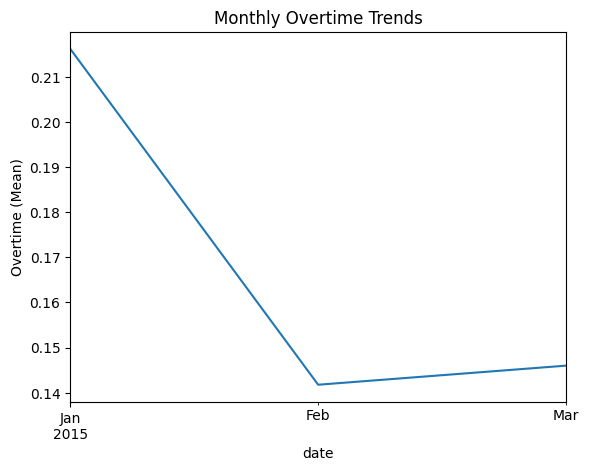

In [80]:
# Trends over time
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

df['over_time'].resample('M').mean().plot()
plt.title('Monthly Overtime Trends')
plt.ylabel('Overtime (Mean)')
plt.show()


# [MODEL 1] Predicting overtime using Linear Regression (Gaby)

Linear regression is a good choice for predicting overtime minutes since the the relationship between features, such as no. of workers, works and number of unfinished items, and the target is roughly linear. It provides simplicity and interpretability, as the model coefficients clearly indicate how the features influence overtime minutes. Additionally, since it is computationally efficient, linear regression is particularly suitable for predicting continuous variables like overtime minutes, especially in smaller or less complex datasets like these.

In [81]:
class AnalyticalMethod(object):

    def __init__(self):
        """Class constructor for AnalyticalMethod
        """
        self.W = None

    def feature_transform(self, X):
        """Appends a vector of ones for the bias term.

        Arguments:
            X {np.ndarray} -- A numpy array of shape (N, D) consisting of N
            samples each of dimension D.

        Returns:
            np.ndarray -- A numpy array of shape (N, D + 1)
        """
        if X.ndim == 1:
            X = X.reshape(-1, 1)

        f_transform = np.hstack([np.ones((X.shape[0], 1)), X])

        return f_transform

    def compute_weights(self, X, y):
        """Compute the weights based on the analytical solution.

        Arguments:
            X {np.ndarray} -- A numpy array of shape (N, D) containing the
            training data; there are N training samples each of dimension D.
            y {np.ndarray} -- A numpy array of shape (N, 1) containing the
            ground truth values.

        Returns:
            np.ndarray -- weight vector; has shape (D, 1) for dimension D
        """
        
        X = self.feature_transform(X)

        self.W = np.linalg.pinv(X.T @ X) @ X.T @ y

        return self.W

    def predict(self, X):
        """Predict values for test data using analytical solution.

        Arguments:
            X {np.ndarray} -- A numpy array of shape (num_test, D) containing
            test data consisting of num_test samples each of dimension D.

        Returns:
            np.ndarray -- A numpy array of shape (num_test, 1) containing
            predicted values for the test data, where y[i] is the predicted
            value for the test point X[i].
        """

        X = self.feature_transform(X)
        prediction = X @ self.W

        return prediction

## Data Pre-processing

Before we start with our model, let's take a look again and pre-process the data.

In [82]:
import random as rnd
from sklearn import datasets, linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score


In [83]:
df.head(n=6)

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,unscalled_over_time,month,workers_per_smv,z_score
date,,,,,,,,,,,,,,,,,,
2015-01-01,Quarter1,sweing,Thursday,8,0.80,0.450252,0.047920,0.273148,0.027222,0.0,0.0,0.0,0.655172,0.940725,7080,1,0.000008,0.750589
2015-01-01,Quarter1,finishing,Thursday,1,0.75,0.020132,0.000000,0.037037,0.000000,0.0,0.0,0.0,0.068966,0.886500,960,1,0.000019,-1.077682
2015-01-01,Quarter1,sweing,Thursday,11,0.80,0.164731,0.041865,0.141204,0.013889,0.0,0.0,0.0,0.327586,0.800570,3660,1,0.000011,-0.271092
2015-01-01,Quarter1,sweing,Thursday,12,0.80,0.164731,0.041865,0.141204,0.013889,0.0,0.0,0.0,0.327586,0.800570,3660,1,0.000011,-0.271092
2015-01-01,Quarter1,sweing,Thursday,6,0.80,0.445219,0.050601,0.074074,0.013889,0.0,0.0,0.0,0.620690,0.800382,1920,1,0.000008,-0.790895
2015-01-01,Quarter1,sweing,Thursday,7,0.80,0.445219,0.042557,0.259259,0.010556,0.0,0.0,0.0,0.620690,0.800125,6720,1,0.000008,0.643044


We can use this plot as a simple basis for the predictions

<Axes: ylabel='Frequency'>

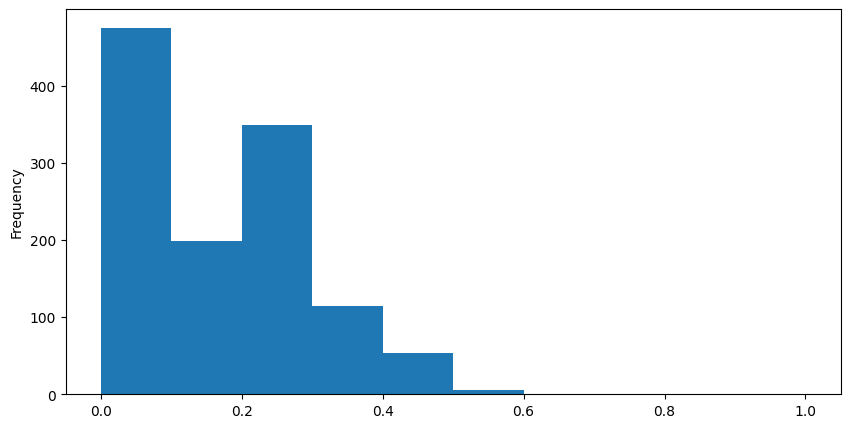

In [84]:
plt.figure(figsize = (10,5))
df['over_time'].plot(kind = "hist")

In [85]:
df.columns

Index(['quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv',
       'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity',
       'unscalled_over_time', 'month', 'workers_per_smv', 'z_score'],
      dtype='object')

To pre-process the data, we must first drop all the categorical or irrelevant data to the regression model, which are unsuitable for linear regression.

In [86]:
df_linear = df.drop(['quarter',	'department', 'team', 'day', 'month', 'unscalled_over_time'], axis = 1)
x = df_linear.drop(['over_time'], axis = 1)
y = df_linear['over_time']
df_linear.head(n=6)
df_linear.columns

Index(['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
       'actual_productivity', 'workers_per_smv', 'z_score'],
      dtype='object')

Let's take a look again at the heatmap for the values since it will help us identify relationships between features and the `over_time`, as well as multicollinearity between features.

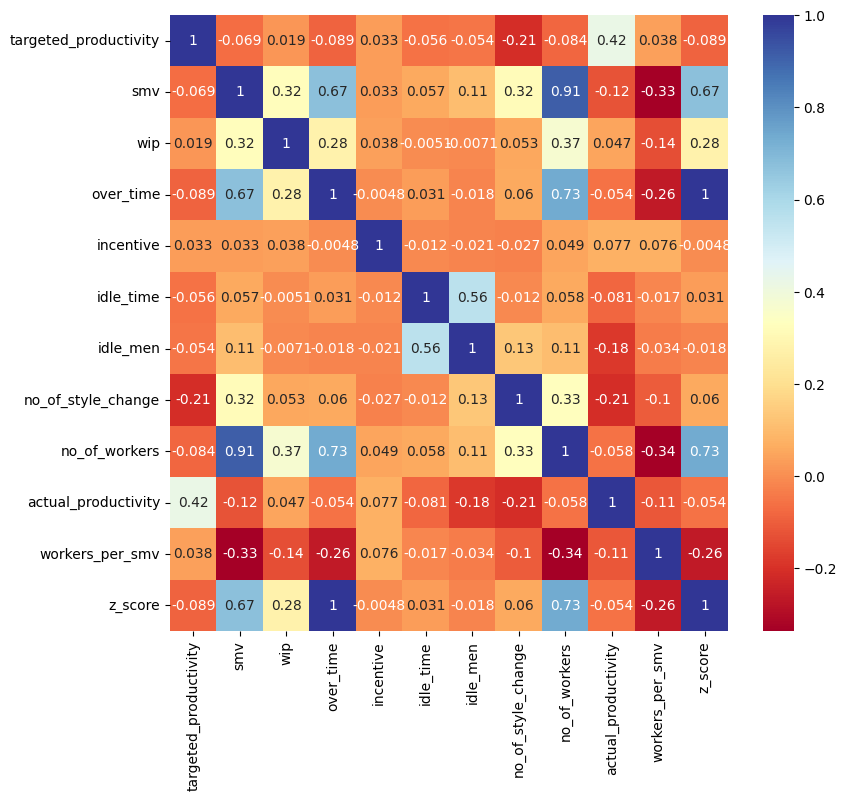

In [87]:
plt.figure(figsize = (9,8))
corr_linear = df_linear.corr()
sns.heatmap(corr_linear, annot=True, cmap=plt.cm.RdYlBu)
plt.show()

We will focus on selecting features with a correlation greater than 0.25.

Initially, the plan was to choose features with a correlation above 0.5; however, this resulted in fewer features with lower variability, which slightly reduced the consistency with the accuracy of the model. By lowering the threshold to 0.25, we capture a broader set of features, allowing for more variability and potentially improving model performance.

In [88]:
target_corr = abs(corr_linear['over_time'])
pos_corr_target = target_corr[target_corr > 0.25]
pos_corr_target

smv                0.674887
wip                0.276529
over_time          1.000000
no_of_workers      0.734164
workers_per_smv    0.262072
z_score            1.000000
Name: over_time, dtype: float64

Here we drop all unnecessary features.

In [89]:
x = x.drop(['targeted_productivity', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'actual_productivity', 'workers_per_smv', 'z_score'], axis=1)
x

,smv,wip,no_of_workers
date,,,
2015-01-01,0.450252,0.047920,0.655172
2015-01-01,0.020132,0.000000,0.068966
2015-01-01,0.164731,0.041865,0.327586
2015-01-01,0.164731,0.041865,0.327586
2015-01-01,0.445219,0.050601,0.620690
...,...,...,...
2015-03-11,0.000000,0.000000,0.068966
2015-03-11,0.019357,0.000000,0.068966
2015-03-11,0.019357,0.000000,0.068966


In [90]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(718, 3) (718,)
(479, 3) (479,)


## Analytical Solution

Now, let's begin with the analytical solution. We will be using the `garments.py` to store our functions for analytical solution.

In [91]:
from garments import AnalyticalMethod

Compute the weights by calling the function `compute_weights()` and assign the return value to variable `W`.

In [92]:
analytical_method = AnalyticalMethod()

W = analytical_method.compute_weights(x_train, y_train.to_numpy().reshape(-1, 1))

Then, we will get the predicted `y` values and assign the return value to variable `y_predicted`, which should mostly fall under 0.0 to 0.1 and 0.2 to 0.3.

In [93]:
y_predict = analytical_method.predict(x_test)
y_predict[0:10]

array([[0.27484825],
       [0.13940663],
       [0.26542337],
       [0.26703683],
       [0.26699347],
       [0.26901771],
       [0.15869053],
       [0.17398493],
       [0.17398695],
       [0.08963619]])

We will be creating a scatter plot that visualizes how residuals are distributed across predicted values.

Ideally, residuals should be randomly scattered around 0, showing that the model does not systematically over- or under-predict.

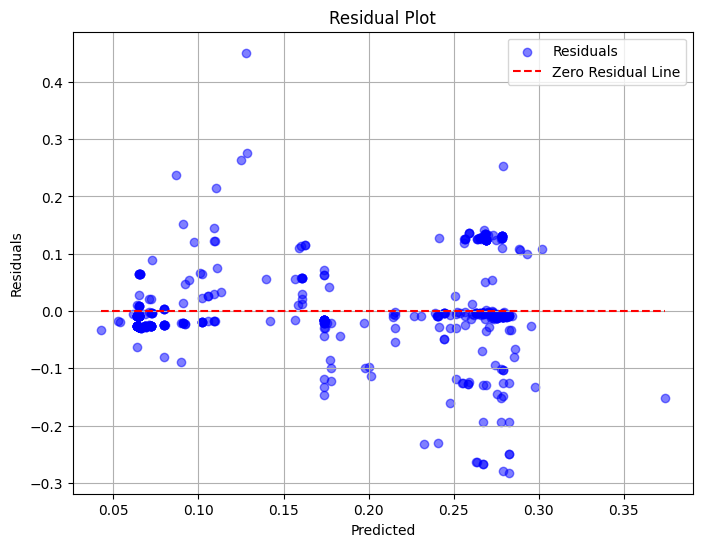

In [94]:
y_predict = y_predict.flatten()


residuals = y_test - y_predict
plt.figure(figsize=(8, 6))

plt.scatter(y_predict, residuals, color='blue', alpha=0.5, label='Residuals')

# Add horizontal line at 0 (zero residuals)
plt.hlines(y=0, xmin=y_predict.min(), xmax=y_predict.max(), colors='red', linestyles='dashed', label='Zero Residual Line')

plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.legend()
plt.grid()
plt.show()

Here we can see that the residuals are scattered around the zero line , with no clear upward or downward trend. In addition, the randomness of the residuals suggests that the model is fitting the data reasonably. There are also no visible patterns, such as curves or clusters in the residuals, which means the model is not missing any significant relationships in the data. This indicates that the model doesn't exhibit systematic errors, which is a good sign.

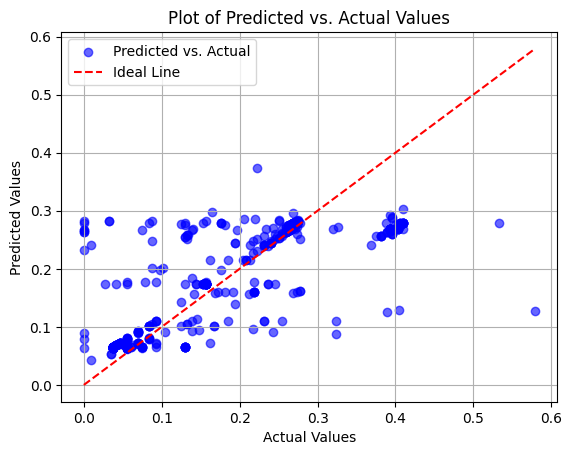

In [95]:
# Scatter plot of predicted vs actual values
fig, ax = plt.subplots()
ax.scatter(y_test, y_predict, alpha=0.6, label="Predicted vs. Actual", color="blue")

# Diagonal line
min_val = min(min(y_test), min(y_predict))
max_val = max(max(y_test), max(y_predict))
ideal_line, = ax.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Line')

ax.set_title("Plot of Predicted vs. Actual Values")
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
ax.legend()
ax.grid()

plt.show()

Based on the graph, while there is a clear upward trend, there are noticeable deviations where the predicted values do not match the actual values perfectly. This can be seen for some low and mid-range actual values, the predicted values tend to be consistently lower than the actual values.

In the higher range of actual values, there seems to be some under-prediction, where the predicted values are consistently below the actual values. This might suggest that the model struggles to capture the upper end of the data.

However, the model is doing reasonably well overall, as the predicted values follow the trend of the actual values.

In [96]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate performance on the test set
y_predict = analytical_method.predict(x_test)
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_predict)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2}')

Mean Squared Error: 0.00648409008460613
Root Mean Squared Error (RMSE): 0.08052384792473674
R² Score: 0.582767808768246


In Mean Squared Error (MSE), 0.007 indicates that, on average, the squared error between the predicted and actual overtime hours is very low. This suggests that the model's predictions are fairly close to the actual values.

Root Mean Squared Error (RMSE):
0.084 minutes is the average magnitude of prediction error in the same unit as the `over_time`. A prediction error of around this number is relatively small, which is a positive outcome for this task.

In the R² Score, 0.564 indicates that the model explains about 56.4% of the variability in overtime hours. While this shows the model has some predictive power, nearly half of the variability remains unexplained. For a task like predicting overtime hours, this suggests there may be other factors influencing the outcome that the model hasn't accounted for, which can be equated to the fact that we are only looking at 3 out of 15 features due to its low correlation to other features.

## Gradient Descent

In [97]:
from sklearn.linear_model import SGDRegressor

Before we start, we will be using GridSearchCV, which is a tool for systematically searching the best combination of hyperparameters for a given model by testing all specified parameter combinations. The specified parameter combinations we will be looking into is:

eta0:

*   eta0
  *  The initial learning rate
  * Values to test: [0.001, 0.01, 0.1].
*   max_iter
  * The maximum number of iterations allowed for the optimization process to converge.
  * Values to test: [1000, 5000, 10000].
* penalty
  * The type of regularization to apply:
'l2': Ridge regularization.
'l1': Lasso regularization.
None: No regularization.
  * Values to test: ['l2', 'l1', None].
* learning_rate
  * The schedule for adjusting the learning rate:
'constant': Keeps the learning rate fixed.
'invscaling': Decreases the learning rate inversely with time.
'adaptive': Adjusts the learning rate based on model performance.
  * Values to test: ['constant', 'invscaling', 'adaptive'].
* alpha
  * Regularization strength (applies to 'l2' and 'l1' penalties).
Higher values mean stronger regularization.
  * Values to test: [0.0001, 0.001, 0.01].


In [98]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'eta0': [0.001, 0.01, 0.1],             # Learning rate options
    'max_iter': [1000, 5000, 10000],         # Number of iterations
    'penalty': ['l2', 'l1', None],           # Regularization types: L2 (Ridge), L1 (Lasso), and no regularization
    'learning_rate': ['constant', 'invscaling', 'adaptive'],  # Learning rate schedule options
    'alpha': [0.0001, 0.001, 0.01]           # Regularization strength for L2 and L1
}

grid_search = GridSearchCV(SGDRegressor(random_state=1), param_grid, cv=5,
                           scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score (Negative MSE):", grid_search.best_score_)

best_params = grid_search.best_params_


best_model = grid_search.best_estimator_

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'alpha': 0.0001, 'eta0': 0.1, 'learning_rate': 'adaptive', 'max_iter': 1000, 'penalty': 'l1'}
Best Score (Negative MSE): -0.008679421946914383


Now we will create the model using the best parameters.

In [99]:
model = SGDRegressor(alpha=best_params['alpha'], eta0=best_params['eta0'],
                     max_iter=best_params['max_iter'], penalty=best_params['penalty'],
                     learning_rate=best_params['learning_rate'],
                     random_state=1, verbose=1)

First, we will see how it performs after 1 training epoch and assign the return value to variable `y_predicted`.

In [100]:
model.partial_fit(x_train, y_train)

-- Epoch 1
Norm: 0.30, NNZs: 3, Bias: 0.051376, T: 718, Avg. loss: 0.004753
Total training time: 0.00 seconds.


SGDRegressor(eta0=0.1, learning_rate='adaptive', penalty='l1', random_state=1,
             verbose=1)

In [101]:
y_predict = model.predict(x_test)

Then, just like before let's graph and observe.

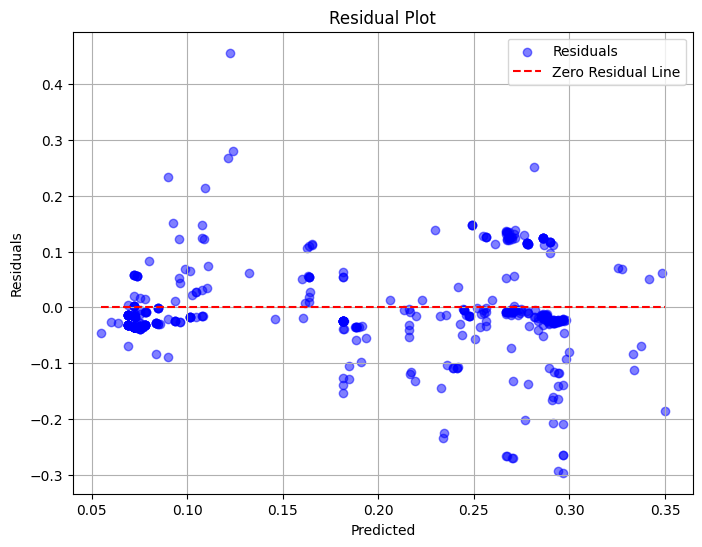

In [102]:
residuals = y_test - y_predict
plt.figure(figsize=(8, 6))

plt.scatter(y_predict, residuals, color='blue', alpha=0.5, label='Residuals')

# horizontal line at 0 (zero residuals)
plt.hlines(y=0, xmin=y_predict.min(), xmax=y_predict.max(), colors='red', linestyles='dashed', label='Zero Residual Line')

plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.legend()
plt.grid()
plt.show()

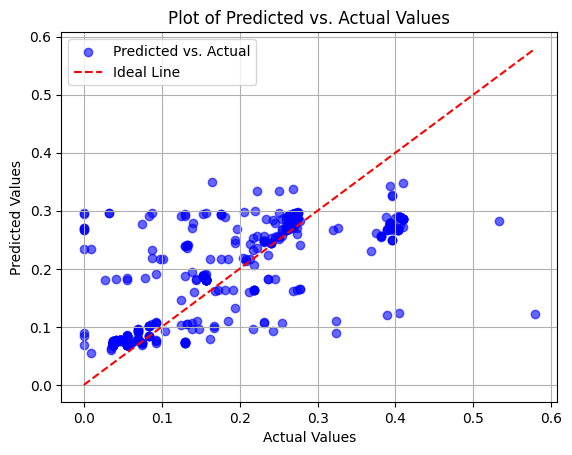

In [103]:
# Scatter plot of predicted vs actual values
fig, ax = plt.subplots()
ax.scatter(y_test, y_predict, alpha=0.6, label="Predicted vs. Actual", color="blue")

# Diagonal line
min_val = min(min(y_test), min(y_predict))
max_val = max(max(y_test), max(y_predict))
ideal_line, = ax.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Line')

ax.set_title("Plot of Predicted vs. Actual Values")
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
ax.legend()
ax.grid()

plt.show()

Based on the graphs, at 1 epoch, the model shows reasonable predictions but likely has room for improvement as indicated by some variance from the ideal lines. But, the model’s performance will likely improve as it goes through more epochs.

After this, we can finish training the model by calling the `fit()` function of the model and grph it again.

In [104]:
model.fit(x_train, y_train)

-- Epoch 1
Norm: 0.30, NNZs: 3, Bias: 0.051376, T: 718, Avg. loss: 0.004753
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 3, Bias: 0.045917, T: 1436, Avg. loss: 0.004548
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.31, NNZs: 2, Bias: 0.024655, T: 2154, Avg. loss: 0.004534
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.34, NNZs: 2, Bias: 0.046320, T: 2872, Avg. loss: 0.004602
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.32, NNZs: 2, Bias: 0.013413, T: 3590, Avg. loss: 0.004557
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.36, NNZs: 2, Bias: 0.039533, T: 4308, Avg. loss: 0.004611
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.36, NNZs: 2, Bias: 0.030749, T: 5026, Avg. loss: 0.004311
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.36, NNZs: 2, Bias: 0.031532, T: 5744, Avg. loss: 0.004301
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.37, NNZs: 2, Bias: 0.043301, T: 6462, Avg. loss: 0.004339
Total training time: 0.00 se

SGDRegressor(eta0=0.1, learning_rate='adaptive', penalty='l1', random_state=1,
             verbose=1)

In [105]:
y_predict = model.predict(x_test)

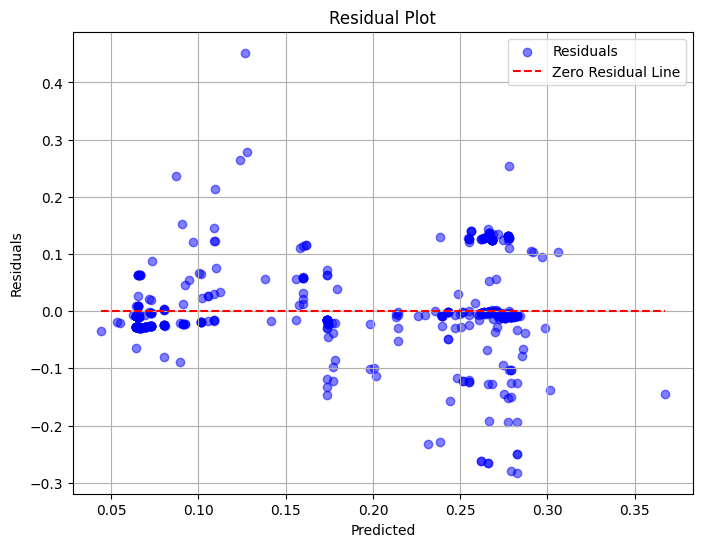

In [106]:
y_predict = y_predict.flatten()

residuals = y_test - y_predict

plt.figure(figsize=(8, 6))

plt.scatter(y_predict, residuals, color='blue', alpha=0.5, label='Residuals')

# Add horizontal line at 0 (zero residuals) with label
plt.hlines(y=0, xmin=y_predict.min(), xmax=y_predict.max(), colors='red', linestyles='dashed', label='Zero Residual Line')

plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.legend()
plt.grid()
plt.show()

Here we are finally getting the similar graph to the one we had before, indicating that the model doesn't exhibit systematic errors.

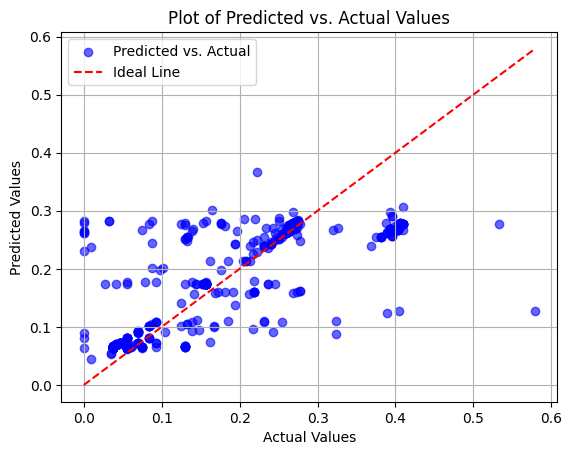

In [107]:
# Scatter plot of predicted vs actual values
fig, ax = plt.subplots()
ax.scatter(y_test, y_predict, alpha=0.6, label="Predicted vs. Actual", color="blue")

# Diagonal line
min_val = min(min(y_test), min(y_predict))
max_val = max(max(y_test), max(y_predict))
ideal_line, = ax.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Line')

ax.set_title("Plot of Predicted vs. Actual Values")
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
ax.legend()
ax.grid()

plt.show()

Again, we are seeing  similar graph to the one we had before in the analytical solution. Here the model is doing reasonably well overall, since the predicted values follow the trend of the actual values.

In [108]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate performance on the test set
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2}')

Mean Squared Error: 0.006505005398854816
Root Mean Squared Error (RMSE): 0.08065361367511574
R² Score: 0.5814219696018534


Similar to the previous result:

In Mean Squared Error (MSE), 0.0.00721 it is higher than analytical solution's 0.00720, which indicates that, on average, the squared error between the predicted and actual overtime hours is very low.

In Root Mean Squared Error (RMSE), 0.085 minutes is the average magnitude of prediction error which is higher than analytical solition's 0.0848.

In the R² Score, 0.563 indicates that the model explains about 56.3% of the variability in overtime hours, but is lower than analytical solution's 0.564.

## Conclusion for Linear Regression


We can conclude that gradient descent is less accurate than the analytical solution in this scenario. The analytical solution achieves a zero loss, providing exact results, whereas gradient descent iteratively minimizes the loss and may not reach the exact minimum. While the analytical solution is precise, it can be computationally expensive, especially for larger datasets. Given our comparatively smaller dataset, the computational cost is manageable, but gradient descent, despite the fine tuning, is better suited for larger datasets where its scalability and efficiency outweigh its limitations in precision.

We can also see that our models are overall effective for this data set.  

# [MODEL 2] Predicting overtime using a neural network (Matthew Ong)

In this section, we will be predicting *over_time* using a PyTorch neural network, which we will build as we go along. We will be using all of the other columns from the dataset as the model's features, with the exception of date (which will be explained later).

The reason we chose a neural network as one of our machine learning models for this problem is because, as seen in the EDA, **many features in the dataset individually have little-to-no correlation with *over_time***. While this might typically pose a challenge, **neural networks are able to capture the subtle, non-linear relationships** that might exist where a combination of those features might have a much bigger impact than any one of them alone. Its ability to learn such patterns is the main reason we are using a neural network.

In [109]:
# everything needed pre-model 2 is in this cell!

import joblib

over_time_scaler = MinMaxScaler()
df['over_time'] = over_time_scaler.fit_transform(df[['over_time']])
joblib.dump(over_time_scaler, 'over_time_scaler.pkl')

['over_time_scaler.pkl']

Let us first import all the needed modules.

In [110]:
from sklearn.model_selection import train_test_split, KFold
import torch.optim as optim
import torch.nn as nn
import torch.nn.init
import torch
import numpy as np
from scipy.stats import skew
import time

In [111]:
class DataLoader(object):
    def __init__(self, X, y, batch_size):
        self.X = X
        self.y = y
        self.batch_size = batch_size

        self.indices = np.array([i for i in range(self.X.shape[0])])
        np.random.seed(1)

    def shuffle(self):
        np.random.shuffle(self.indices)

    def get_batch(self, mode='train'):
        """Returns self.X and self.y divided into different batches of size
        self.batch_size according to the shuffled self.indices."""

        X_batch = []
        y_batch = []

        if mode == 'train':
            self.shuffle()
        elif mode == 'test':
            self.indices = np.array([i for i in range(self.X.shape[0])])

        for i in range(0, len(self.indices), self.batch_size):
            if i + self.batch_size <= len(self.indices):
                indices = self.indices[i:i + self.batch_size]
            else:
                indices = self.indices[i:]

            X_batch.append(self.X[indices])
            y_batch.append(self.y[indices])

        return X_batch, y_batch

class NeuralNetwork(nn.Module):

    def __init__(self,
                 input_size,
                 num_classes,
                 list_hidden):
        super(NeuralNetwork, self).__init__()

        self.input_size = input_size
        self.num_classes = num_classes
        self.list_hidden = list_hidden

    def create_network(self):
        layers = []

        layers.append(torch.nn.Linear(in_features=self.input_size, out_features=self.list_hidden[0]))
        layers.append(nn.ReLU())

        for i in range(len(self.list_hidden) - 1):
            layers.append(torch.nn.Linear(in_features=self.list_hidden[i], out_features=self.list_hidden[i+1]))
            layers.append(nn.ReLU())

        layers.append(torch.nn.Linear(in_features=self.list_hidden[-1], out_features=1)) # made output neuron always one
        
        self.layers = nn.Sequential(*layers) # removed softmax layer

    def init_weights(self):
        torch.manual_seed(2)

        for module in self.modules():

            if isinstance(module, nn.Linear):

                nn.init.normal_(module.weight, mean=0, std=0.1)

                nn.init.constant_(module.bias, 0)

    def forward(self,
                x,
                verbose=False):

        for i, layer in enumerate(self.layers):
            x = layer(x)

        if verbose:
            print(f'Output of layer {i}:', x, '\n')

        return x  # final output for regression

**Data preparation**

From our dataframe with the preprocessed data, we'll assign the features to *X* and the target (over_time) to *y*. 

We will not be including the date feature as we feel that it isn't meaningful to the model as is. Additionally, the year component is irrelevant since all records are from the same year anyway (2015). Instead, the network will be using the derived **month column** alongside the quarter and day columns to capture any potential temporal trends.

We also remove the columns added during EDA, namely z_score and workers_per_smv.

In [112]:
df_nn = df.reset_index() # remove the date as index
X = df_nn.drop(columns=['over_time', 'z_score', 'workers_per_smv', 'date', 'unscalled_over_time'])
y = df_nn['over_time']

In [113]:
#debugging
print(X.shape)
print(X)
print(y.shape)
print(y)

(1197, 14)
       quarter department        day  team  targeted_productivity       smv  \
0     Quarter1     sweing   Thursday     8                   0.80  0.450252   
1     Quarter1  finishing   Thursday     1                   0.75  0.020132   
2     Quarter1     sweing   Thursday    11                   0.80  0.164731   
3     Quarter1     sweing   Thursday    12                   0.80  0.164731   
4     Quarter1     sweing   Thursday     6                   0.80  0.445219   
...        ...        ...        ...   ...                    ...       ...   
1192  Quarter2  finishing  Wednesday    10                   0.75  0.000000   
1193  Quarter2  finishing  Wednesday     8                   0.70  0.019357   
1194  Quarter2  finishing  Wednesday     7                   0.65  0.019357   
1195  Quarter2  finishing  Wednesday     9                   0.75  0.000000   
1196  Quarter2  finishing  Wednesday     6                   0.70  0.000000   

           wip  incentive  idle_time  id

Next, we need to one-hot encode the categorical features (quarter, department, and day) because neural networks can only work with numerical data.

In [114]:
X = pd.get_dummies(X, columns=['quarter', 'department', 'day'])
X = X.astype(float) # convert the True/False into 1/0

In [115]:
#debugging
print(X.shape)
print(X.columns)

(1197, 24)
Index(['team', 'targeted_productivity', 'smv', 'wip', 'incentive', 'idle_time',
       'idle_men', 'no_of_style_change', 'no_of_workers',
       'actual_productivity', 'month', 'quarter_Quarter1', 'quarter_Quarter2',
       'quarter_Quarter3', 'quarter_Quarter4', 'quarter_Quarter5',
       'department_finishing', 'department_sweing', 'day_Monday',
       'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday',
       'day_Wednesday'],
      dtype='object')


**Train-test-validation split**

We will now divide our data into train, test, and validation sets following a 64-20-16 split.

In [116]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split (X_train, y_train, test_size=0.2, random_state=0)

In [117]:
#debugging
print("Train set:")
print(X_train.shape)
print(y_train.shape)
print(y_train[:10])
print("\nTest set:")
print(X_test.shape)
print(y_test.shape)
print(y_test[:10])
print("\nValidation set:")
print(X_val.shape)
print(y_val.shape)
print(y_val[:10])

Train set:
(765, 24)
(765,)
130     0.409722
2       0.141204
1171    0.037037
120     0.406250
452     0.236111
1036    0.129630
932     0.268519
1154    0.037037
410     0.392361
600     0.263889
Name: over_time, dtype: float64

Test set:
(240, 24)
(240,)
700     0.157407
621     0.101852
319     0.069444
837     0.037037
761     0.087963
592     0.222222
1049    0.041667
124     0.381944
251     0.282407
531     0.046296
Name: over_time, dtype: float64

Validation set:
(192, 24)
(192,)
169     0.055556
291     0.055556
302     0.211806
765     0.037037
1149    0.000000
245     0.392361
793     0.152778
262     0.055556
140     0.406250
970     0.171296
Name: over_time, dtype: float64


The train, test, and validation data are converted from pandas DataFrames into PyTorch tensors for use in the neural network later. Conversion to numpy arrays is an intermediate step as there is no direct conversion between DFs and tensors.

In [118]:
X_train = torch.tensor(X_train.to_numpy(), dtype=torch.float32)
y_train = torch.tensor(y_train.to_numpy(), dtype=torch.float32)
X_test = torch.tensor(X_test.to_numpy(), dtype=torch.float32)
y_test = torch.tensor(y_test.to_numpy(), dtype=torch.float32)
X_val = torch.tensor(X_val.to_numpy(), dtype=torch.float32)
y_val = torch.tensor(y_val.to_numpy(), dtype=torch.float32)

**Setting up the neural network**

Now that the data has been processed and split into train, test, and validation, we can now set up the neural network. Before that, we will use DataLoader to batch our training data as we will be performing mini-batch gradient descent.

In [119]:
train_dataloader = DataLoader(X_train, y_train, 16)

We then define a class with the functions needed to build the neural network. This was taken from Lab 5 but with modifications made to suit regression and our particular task. These modifications include changing the hidden layer activation function to ReLU, removing the softmax layer, changing initialization to He, etc.

In [120]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, num_classes, list_hidden):
        super(NeuralNetwork, self).__init__()
        
        self.input_size = input_size
        self.num_classes = num_classes
        self.list_hidden = list_hidden

    def create_network(self):
        layers = []
        layers.append(torch.nn.Linear(in_features=self.input_size, out_features=self.list_hidden[0]))
        layers.append(nn.ReLU()) # made it always use ReLu as the activation function for hidden layers

        for i in range(len(self.list_hidden) - 1):
            layers.append(torch.nn.Linear(in_features=self.list_hidden[i], out_features=self.list_hidden[i+1]))
            layers.append(nn.ReLU()) # made it always use ReLu as the activation function for hidden layers

        layers.append(torch.nn.Linear(in_features=self.list_hidden[-1], out_features=1)) # made output neuron always one
        self.layers = nn.Sequential(*layers) # removed softmax layer

    def init_weights(self):
        torch.manual_seed(2)
        
        for module in self.modules():
            if isinstance(module, nn.Linear):
                nn.init.kaiming_normal_(module.weight, mode='fan_in', nonlinearity='relu') # changed initialization to He since we're using ReLU
                nn.init.constant_(module.bias, 0)

    def forward(self, x, verbose=False):

        for i, layer in enumerate(self.layers):
            x = layer(x)

        if verbose:
            print(f'Output of layer {i}:', x, '\n')

        return x  # final output for regression

Next, we prepare the different hyperparameter variations that we will be considering for tuning. In this problem, we will be tuning the neural network structure (the number of hidden layers and nodes in each hidden layer) and the ADAM optimizer learning rate.

In [121]:
network_structures = [[8], [16,], [32], [16, 8], [32, 16], [32, 16, 8]]
adam_learning_rates = [0.1, 0.01, 0.001, 0.0001, 0.00001]

We also set our loss function to Mean Squared Error (MSE) as it is a common choice for regression tasks.

In [122]:
criterion = nn.MSELoss()

We use everything we've just defined to build a *train_and_validate* function that allows us to train the model on the training data, then test it on the validation data. The different configurations of network structure + optimizer learning rate will be **compared based on their validation set loss**, and the configuration with the lowest loss will be selected as the optimum setup.

In [123]:
def train_and_validate (train_dataloader, X, y, learning_rate, network_structure, test=False, verbose=False):
    max_epochs = 300
    min_change = 0.000003
    this_epoch = 0
    is_converged = False
    prev_loss = 0.0
    
    ann = NeuralNetwork(input_size=24, num_classes=1, list_hidden=network_structure) # we will tune the network structure
    ann.create_network() # builds the neural network
    ann.init_weights() # initializes the weights according to He initialization
    
    optimizer = optim.Adam(ann.parameters(), lr=learning_rate) # we will tune the learning rate

    # train the model
    ann.train() # sets the model to train mode
    while this_epoch < max_epochs and is_converged is not True:
        this_loss = 0.0
        
        for X_batch, y_batch in zip(*train_dataloader.get_batch(mode='train')):
            optimizer.zero_grad() # empties the gradients
            scores = ann.forward(X_batch) # forward propagation
            loss = criterion(scores, y_batch.view(-1, 1)) # get the loss
            loss.backward() # backpropagation
            optimizer.step() # update the weights
            
            this_loss += loss.item()

        average_loss = this_loss / len(X_batch)

        if abs(prev_loss - average_loss) < min_change: # stop training early if the change in loss is less than a given minimum
            is_converged = True
            print(f"Training stopped early due to convergence (Epoch: {this_epoch + 1}).")
            print(f"Loss difference vs previous epoch: {abs(prev_loss - average_loss):.10f}")
            break
        
        else:
            prev_loss = average_loss
            this_epoch+=1

        if verbose:
            print(f'Epoch {this_epoch}/{max_epochs}, Loss: {average_loss}')


    # evaluate the model (using the validation set)
    ann.eval()

    with torch.no_grad(): # PyTorch doesn't need to track gradients since we're just evaluating (no updating weights)
        final_scores = ann.forward(X)
        final_loss = criterion(final_scores, y.view(-1, 1))
        
    if test is False:
        print(f"Validation Loss: {final_loss}")
        return final_loss  

    else:
        print(f"Test Loss: {final_loss}")

    return final_loss, final_scores

Now we can perform our hyperparameter tuning proper where we will call our *train_and_validate* function multiple times, each time with a different combination of network structure and optimizer learning rate. The one which produces the best validation set loss will be used in our final model.

In [124]:
def hyperparam_tuning ():
    best_val_loss = 100000
    best_network_structure = None
    best_adam_learning_rate = None
    
    start_time = time.time()
    
    for learning_rate in adam_learning_rates:
        for structure in network_structures:
            print(f"Learning rate: {learning_rate} & Network structure: {structure}")
            val_loss = train_and_validate(train_dataloader, X_val, y_val, learning_rate, structure, verbose=False) # getting each configuration's val loss
    
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                best_adam_learning_rate = learning_rate
                best_network_structure = structure
                
    end_time = time.time()
    training_time = end_time - start_time
    
    print(f"Best Learning Rate: {best_adam_learning_rate}")
    print(f"Best Hidden Layer Configuration: {best_network_structure}")
    print(f"Best Validation Loss: {best_val_loss}")
    print(f"Total hyperparameter tuning time: {training_time:.2f} seconds")

    return best_adam_learning_rate, best_network_structure

In [125]:
best_adam_learning_rate, best_network_structure = hyperparam_tuning()

Learning rate: 0.1 & Network structure: [8]
Training stopped early due to convergence (Epoch: 34).
Loss difference vs previous epoch: 0.0000018254
Validation Loss: 0.005854604300111532
Learning rate: 0.1 & Network structure: [16]
Validation Loss: 0.0068397908471524715
Learning rate: 0.1 & Network structure: [32]
Validation Loss: 0.010929175652563572
Learning rate: 0.1 & Network structure: [16, 8]
Validation Loss: 0.016829514876008034
Learning rate: 0.1 & Network structure: [32, 16]
Validation Loss: 0.01964404247701168
Learning rate: 0.1 & Network structure: [32, 16, 8]
Validation Loss: 0.019985990598797798
Learning rate: 0.01 & Network structure: [8]
Validation Loss: 0.005393112078309059
Learning rate: 0.01 & Network structure: [16]
Training stopped early due to convergence (Epoch: 213).
Loss difference vs previous epoch: 0.0000017776
Validation Loss: 0.005336632952094078
Learning rate: 0.01 & Network structure: [32]
Validation Loss: 0.006162100937217474
Learning rate: 0.01 & Network s

Having performed the hyperparameter tuning, we now know the best network structure and ADAM optimizer learning rate for our model (at least on the validation set). At this point, we can finally train and test our optimized model on the test set using those parameters. Once this is done, we print the loss and the predictions.

In [126]:
start_time = time.time()

test_loss, test_scores = train_and_validate(train_dataloader, X_test, y_test, best_adam_learning_rate, best_network_structure, test=True, verbose=False)

end_time = time.time()
training_time = end_time - start_time
print(f"Final model training and testing time: {training_time:.2f} seconds")

Test Loss: 0.0038600722327828407
Final model training and testing time: 10.87 seconds


In [127]:
#debugging
numberOfRows = 10
print(test_loss)
print(test_scores.shape)
print(test_scores[:numberOfRows])

tensor(0.0039)
torch.Size([240, 1])
tensor([[0.1186],
        [0.0881],
        [0.0698],
        [0.0259],
        [0.1577],
        [0.2391],
        [0.1184],
        [0.3734],
        [0.2788],
        [0.0377]])


**Interpreting the result**

How do we interpret the final result? The first thing we have to do is to denormalize the model's predictions using the same scaler that was used to normalize the targets earlier in the notebook. We also denormalize y_test so we can compare the predictions to it in the original scale (minutes).

In [128]:
overtimescaler = joblib.load('over_time_scaler.pkl')
test_scores_denormalized = overtimescaler.inverse_transform(test_scores.reshape(-1, 1))
y_test_denormalized = overtimescaler.inverse_transform(y_test.reshape(-1, 1))

In [129]:
#debugging
numberOfRows = 15
for i in range(numberOfRows):
    print(f"Prediction: {test_scores_denormalized[i]}, True Value: {y_test_denormalized[i]}")

Prediction: [0.11862016], True Value: [0.1574074]
Prediction: [0.08805198], True Value: [0.10185185]
Prediction: [0.06976113], True Value: [0.06944445]
Prediction: [0.02589659], True Value: [0.03703704]
Prediction: [0.15768613], True Value: [0.08796296]
Prediction: [0.23907179], True Value: [0.22222222]
Prediction: [0.11842705], True Value: [0.04166667]
Prediction: [0.37342098], True Value: [0.38194445]
Prediction: [0.27876061], True Value: [0.2824074]
Prediction: [0.03767169], True Value: [0.04629629]
Prediction: [0.20704406], True Value: [0.24074075]
Prediction: [0.17628811], True Value: [0.11111111]
Prediction: [0.25478274], True Value: [0.2638889]
Prediction: [0.16985589], True Value: [0.10416666]
Prediction: [0.21629113], True Value: [0.08796296]


We also take the square root of the MSE to get the RMSE, then bring it into the original scale (minutes) just like the predictions by denormalizing it. **This value is the amount of minutes the model's predictions are off by, on average.** For example, an RMSE of 500 means that the predictions are usually off by around 500 minutes.

In [130]:
rmse = torch.sqrt(test_loss)
rmse_denormalized = overtimescaler.inverse_transform(rmse.reshape(-1, 1))

In [131]:
#debugging
print(f"MSE: {test_loss}")
print(f"RMSE: {rmse}")
print(f"RMSE denormalized (minutes): {rmse_denormalized}")

MSE: 0.0038600722327828407
RMSE: 0.06212947890162468
RMSE denormalized (minutes): [[0.06212948]]


Now we can visualize how the predictions compare to the correct answers by using a scatterplot. Each blue dot represents a prediction, and their distance from the red line is the error or RMSE.

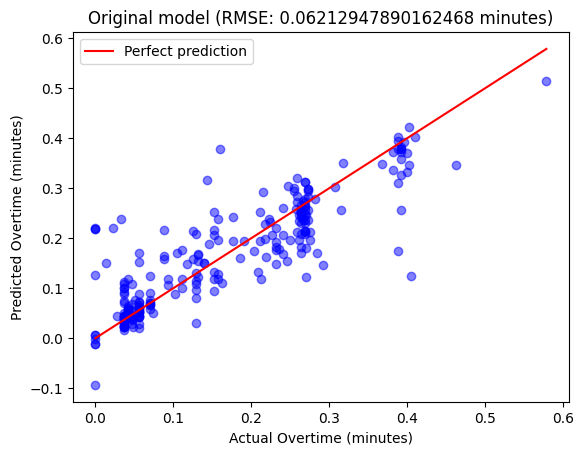

In [132]:
plt.scatter(y_test_denormalized, test_scores_denormalized, alpha=0.5, color='blue')
plt.plot([min(y_test_denormalized), max(y_test_denormalized)], [min(y_test_denormalized), max(y_test_denormalized)], color='red', label='Perfect prediction')
plt.xlabel('Actual Overtime (minutes)')
plt.ylabel('Predicted Overtime (minutes)')
plt.title(f'Original model (RMSE: {rmse_denormalized[0,0]} minutes)') # used the index so it wouldn't be inside square brackets
plt.legend()
plt.show()

**Improving the model**

Despite the hyperparameter tuning we did, the model's predictions are still off by around 1600-2000 minutes on average. This is pretty tragic because the mean of the over_time column is around 4567 minutes, meaning **the predictions are wrong by between a third and half the typical overtime value!** The following section will used to test several theories as to why this is the case and how we might be able to improve the model.

**IMPROVEMENT 1 : Binning & Stratification** 

*Theory: Perhaps my train, test, and validation splits are not representing the overall dataset well enough.*

For categorical targets, we usually stratify when splitting the dataset to ensure the proportions of the classes are similar across the different sets. In this case, it is a little tougher because we are dealing with continuous values, but we can get around that by binning *over_time* so that they become categorical. 

There are two types of binning: equal-width (better when the target instances are evenly distributed) and equal-frequency (better when the target instances are skewed). Thus, before we bin, we must first measure the skewness of *over_time*.

In [133]:
over_time_skewness = skew(df_nn['over_time'])
print(over_time_skewness)

0.6724432830186077


With a skewness of around 0.672, *over_time* is moderately positively skewed, meaning that more data is concentrated around the lower end. As such, we will choose equal-frequency binning. We make a temporary column containing only 5 bins, as any higher leads to a very unequal number of instances per bin.

In [134]:
df_nn['over_time_bins'] = pd.qcut(df_nn['over_time'], q=5, labels=False)
print(df_nn['over_time_bins'].value_counts())

over_time_bins
0    249
2    240
4    239
3    239
1    230
Name: count, dtype: int64


Now that we have done the binning, we can add the column to X amd perform the train_test split again, stratifying by *over_time_bins*.

In [135]:
print(f'Shape before adding over_time_bins: {X.shape}')
X['over_time_bins'] = df_nn['over_time_bins']
print(f'Shape after adding over_time_bins: {X.shape}')

Shape before adding over_time_bins: (1197, 24)
Shape after adding over_time_bins: (1197, 25)


In [136]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=0, stratify=X['over_time_bins'])
X_train, X_val, y_train, y_val = train_test_split (X_train, y_train, test_size=0.2, random_state=0, stratify=X_train['over_time_bins'])

In [137]:
#debugging
print("Train bins distribution:", np.unique(X_train['over_time_bins'], return_counts=True))
print("Val bins distribution:", np.unique(X_val['over_time_bins'], return_counts=True))
print("Test bins distribution:", np.unique(X_test['over_time_bins'], return_counts=True))

Train bins distribution: (array([0, 1, 2, 3, 4], dtype=int64), array([159, 147, 153, 153, 153], dtype=int64))
Val bins distribution: (array([0, 1, 2, 3, 4], dtype=int64), array([40, 37, 39, 38, 38], dtype=int64))
Test bins distribution: (array([0, 1, 2, 3, 4], dtype=int64), array([50, 46, 48, 48, 48], dtype=int64))


We must not forget to drop *over_time_bins* from our sets after splitting as it isn't a feature for our neural network, it's just a temporary column we used to stratify.

In [138]:
X_train = X_train.drop(columns=['over_time_bins'])
X_val = X_val.drop(columns=['over_time_bins'])
X_test = X_test.drop(columns=['over_time_bins'])

In [139]:
#debugging
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(765, 24)
(192, 24)
(240, 24)


We proceed as usual with our process for preparing and training the model.

In [140]:
# convert to tensors
X_train = torch.tensor(X_train.to_numpy(), dtype=torch.float32)
y_train = torch.tensor(y_train.to_numpy(), dtype=torch.float32)
X_test = torch.tensor(X_test.to_numpy(), dtype=torch.float32)
y_test = torch.tensor(y_test.to_numpy(), dtype=torch.float32)
X_val = torch.tensor(X_val.to_numpy(), dtype=torch.float32)
y_val = torch.tensor(y_val.to_numpy(), dtype=torch.float32)

# use dataloader for the train set
train_dataloader = DataLoader(X_train, y_train, 16)

In [141]:
# hyperparameter tuning
best_adam_learning_rate, best_network_structure = hyperparam_tuning()

Learning rate: 0.1 & Network structure: [8]
Validation Loss: 0.015680698677897453
Learning rate: 0.1 & Network structure: [16]
Validation Loss: 0.008414333686232567
Learning rate: 0.1 & Network structure: [32]
Validation Loss: 0.007247159257531166
Learning rate: 0.1 & Network structure: [16, 8]
Validation Loss: 0.009120372124016285
Learning rate: 0.1 & Network structure: [32, 16]
Validation Loss: 0.015218265354633331
Learning rate: 0.1 & Network structure: [32, 16, 8]
Training stopped early due to convergence (Epoch: 232).
Loss difference vs previous epoch: 0.0000012434
Validation Loss: 0.015272378921508789
Learning rate: 0.01 & Network structure: [8]
Training stopped early due to convergence (Epoch: 85).
Loss difference vs previous epoch: 0.0000025123
Validation Loss: 0.0062155467458069324
Learning rate: 0.01 & Network structure: [16]
Training stopped early due to convergence (Epoch: 73).
Loss difference vs previous epoch: 0.0000003960
Validation Loss: 0.005054506938904524
Learning ra

In [142]:
# training the tuned model
start_time = time.time()

bs_test_loss, bs_test_scores = train_and_validate(train_dataloader, X_test, y_test, best_adam_learning_rate, best_network_structure, test=True, verbose=False)

end_time = time.time()
training_time = end_time - start_time
print(f"Final model training and testing time: {training_time:.2f} seconds")

Test Loss: 0.004738375544548035
Final model training and testing time: 12.86 seconds


In [143]:
#debugging
numberOfRows = 10
print(bs_test_loss)
print(bs_test_scores.shape)
print(bs_test_scores[:numberOfRows])

tensor(0.0047)
torch.Size([240, 1])
tensor([[0.3859],
        [0.1786],
        [0.2527],
        [0.1707],
        [0.2893],
        [0.0944],
        [0.1054],
        [0.1227],
        [0.0766],
        [0.1104]])


It appears that our model with binning and stratification is converging much faster than the original, as the training times are lower due to many more of the hyperparameter tuning runs hitting the minimum loss reduction before reaching the final epoch. Let's take a look at how it performed by getting its predictions and error.

In [144]:
bs_test_scores_denormalized = overtimescaler.inverse_transform(bs_test_scores.reshape(-1, 1))
bs_y_test_denormalized = overtimescaler.inverse_transform(y_test.reshape(-1, 1))

bs_rmse = torch.sqrt(bs_test_loss)
bs_rmse_denormalized = overtimescaler.inverse_transform(bs_rmse.reshape(-1, 1))

In [145]:
#debugging
numberOfRows = 15
for i in range(numberOfRows):
    print(f"Prediction: {bs_test_scores_denormalized[i]}, True Value: {bs_y_test_denormalized[i]}")

Prediction: [0.38592023], True Value: [0.40277779]
Prediction: [0.1785924], True Value: [0.1412037]
Prediction: [0.25274521], True Value: [0.26157406]
Prediction: [0.17073983], True Value: [0.20833333]
Prediction: [0.28933594], True Value: [0.25462964]
Prediction: [0.09440397], True Value: [0.05555556]
Prediction: [0.10542262], True Value: [0.1574074]
Prediction: [0.12266525], True Value: [0.16203703]
Prediction: [0.07658163], True Value: [0.03703704]
Prediction: [0.11044507], True Value: [0.18518518]
Prediction: [0.27378368], True Value: [0.06944445]
Prediction: [0.04927945], True Value: [0.03703704]
Prediction: [0.02503499], True Value: [0.13194445]
Prediction: [0.16504574], True Value: [0.20833333]
Prediction: [0.2459691], True Value: [0.2662037]


In [146]:
#debugging
print(f"MSE: {bs_test_loss}")
print(f"RMSE: {bs_rmse}")
print(f"RMSE denormalized (minutes): {bs_rmse_denormalized}")

MSE: 0.004738375544548035
RMSE: 0.06883586198091507
RMSE denormalized (minutes): [[0.06883586]]


It looks like this model tends to perform slightly better than the original model! Let's visualize this using a scatterplot.

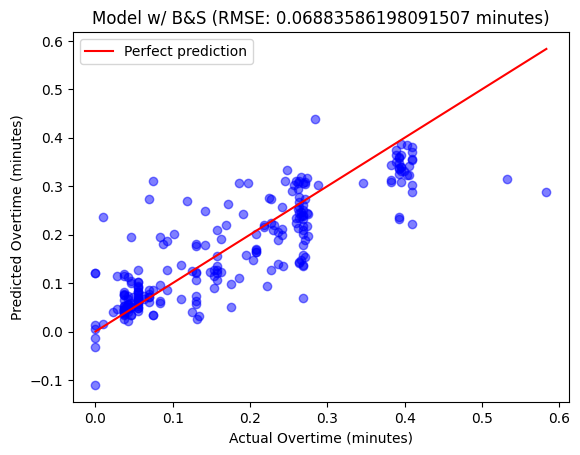

In [147]:
plt.scatter(bs_y_test_denormalized, bs_test_scores_denormalized, alpha=0.5, color='blue')
plt.plot([min(bs_y_test_denormalized), max(bs_y_test_denormalized)], [min(bs_y_test_denormalized), max(bs_y_test_denormalized)], color='red', label='Perfect prediction')
plt.xlabel('Actual Overtime (minutes)')
plt.ylabel('Predicted Overtime (minutes)')
plt.title(f'Model w/ B&S (RMSE: {bs_rmse_denormalized[0,0]} minutes)') # used the index so it wouldn't be inside square brackets
plt.legend()
plt.show()

**IMPROVEMENT 2 : K-fold Cross-Validation** 

*Theory: Perhaps the model is not being fed enough training data.*

With how we're currently splitting the data (80/20 train/test, then 80/20 train/validation), we are only being left with 64% of the data for the training set. Given that there are less than 1,200 instances in total, the training set might be too small for the model to effectively learn the general trend. Let's try to get around this by removing the validation set entirely and replacing it with K-fold Cross Validation for our hyperparameter tuning and model training.

We will be doing this on top of binning and stratification, so let's start by revisiting the our train-test-validation split and making it only split the data into train/test and stratifying by *over_time_bins*.

In [148]:
X['over_time_bins'] = df_nn['over_time_bins']
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=0, stratify=X['over_time_bins'])

In [149]:
#debugging
print("Train bins distribution:", np.unique(X_train['over_time_bins'], return_counts=True))
print("Test bins distribution:", np.unique(X_test['over_time_bins'], return_counts=True))
print(X_train.shape)
print(X_test.shape)

Train bins distribution: (array([0, 1, 2, 3, 4], dtype=int64), array([199, 184, 192, 191, 191], dtype=int64))
Test bins distribution: (array([0, 1, 2, 3, 4], dtype=int64), array([50, 46, 48, 48, 48], dtype=int64))
(957, 25)
(240, 25)


In [150]:
X_train = X_train.drop(columns=['over_time_bins'])
X_test = X_test.drop(columns=['over_time_bins'])

In [151]:
print(X_train.shape)
print(X_test.shape)

(957, 24)
(240, 24)


Don't forget to convert them into tensors first.

In [152]:
X_train = torch.tensor(X_train.to_numpy(), dtype=torch.float32)
y_train = torch.tensor(y_train.to_numpy(), dtype=torch.float32)
X_test = torch.tensor(X_test.to_numpy(), dtype=torch.float32)
y_test = torch.tensor(y_test.to_numpy(), dtype=torch.float32)

We now have our X_train and X_test. Next, let's modify our *train_and_validate* function to leverage K-fold Cross Validation for the training and validation of the model. We will be setting the number of folds to 5 to ensure enough data is in each training cycle (5 cycles; in each cycle: train on 4 folds, validate on the last fold).

**Note:** This incidentally means that we will be training on 64% of the data again, since training on 4/5 folds of training data that is 80% of the whole dataset is just 80% of 80%, exactly the amount when we had the validation set. The difference here, however, is that we will be training it for 5 cycles with each one being validated on a different fold, meaning that we still maximize the entire training set.

In [153]:
def kfcv_train_and_validate (X, y, learning_rate, network_structure, k=5, verbose=False):
    max_epochs = 300
    min_change = 0.000003
    kfcv = KFold(n_splits=k, shuffle=True, random_state=0) # the K-fold object
    fold_losses = []

    for fold, (train_idx, val_idx) in enumerate(kfcv.split(X)):
        if verbose:
            print(f"Fold {fold + 1} of {k}:")

        X_trainfold, y_trainfold = X[train_idx], y[train_idx] # assigning the four training folds
        X_valfold, y_valfold = X[val_idx], y[val_idx] # assigning the validation fold
        train_dataloader = DataLoader(X_trainfold, y_trainfold, 16) # makes a new dataloader per fold because the content of train changes each time

        ann = NeuralNetwork(input_size=24, num_classes=1, list_hidden=network_structure) # we will tune the network structure
        ann.create_network() # builds the neural network
        ann.init_weights() # initializes the weights according to He initialization
        
        optimizer = optim.Adam(ann.parameters(), lr=learning_rate) # we will tune the learning rate

        # early stopping is checked and performed per fold
        this_epoch = 0
        is_converged = False
        prev_loss = 0.0
    
        # train the model
        ann.train() # sets the model to train mode
        while this_epoch < max_epochs and is_converged is not True:
            this_loss = 0.0

            for X_batch, y_batch in zip(*train_dataloader.get_batch(mode='train')):
                optimizer.zero_grad() # empties the gradients
                scores = ann.forward(X_batch) # forward propagation
                loss = criterion(scores, y_batch.view(-1, 1)) # get the loss
                loss.backward() # backpropagation
                optimizer.step() # update the weights
                        
                this_loss += loss.item()

            average_loss = this_loss / len(X_batch)

            if abs(prev_loss - average_loss) < min_change: # stop training early if the change in loss is less than a given minimum
                is_converged = True
                if verbose:
                    print(f"Fold {fold+1} stopped early due to convergence (Epoch: {this_epoch + 1}).")
                    print(f"Loss difference vs previous epoch: {abs(prev_loss - average_loss):.10f}")
                break
    
            else:
                prev_loss = average_loss
                this_epoch+=1

            if verbose:
                print(f'Fold {fold+1}/{k} | Epoch {this_epoch}/{max_epochs}, Loss: {average_loss}')


        # evaluate the model on the validation fold
        ann.eval() # sets the model to evaluation mode

        with torch.no_grad(): # PyTorch doesn't need to track gradients since we're just evaluating (no updating weights)
            fold_scores = ann.forward(X_valfold)
            fold_loss = criterion(fold_scores, y_valfold.view(-1, 1))

        print(f"Fold {fold+1} Loss: {fold_loss}")
        fold_losses.append(fold_loss)

    allfolds_average_loss = sum(fold_losses)/k
    print(f"Average loss across {k} folds: {allfolds_average_loss}")

    return allfolds_average_loss

We will also have to slightly update our hyperparameter tuning loop to use *kfcv_train_and_validate*.

In [154]:
def kfcv_hyperparam_tuning ():
    best_allfolds_average_loss = 100000
    best_network_structure = None
    best_adam_learning_rate = None
    
    start_time = time.time()
    
    for learning_rate in adam_learning_rates:
        for structure in network_structures:
            print(f"Learning rate: {learning_rate} & Network structure: {structure}")
            allfolds_average_loss = kfcv_train_and_validate(X_train, y_train, learning_rate, structure, verbose=False) # getting each configuration's val loss
    
            if allfolds_average_loss < best_allfolds_average_loss:
                best_allfolds_average_loss = allfolds_average_loss
                best_adam_learning_rate = learning_rate
                best_network_structure = structure
                
    end_time = time.time()
    training_time = end_time - start_time
    
    print(f"Best Learning Rate: {best_adam_learning_rate}")
    print(f"Best Hidden Layer Configuration: {best_network_structure}")
    print(f"Best Average Loss: {best_allfolds_average_loss}")
    print(f"Total hyperparameter tuning time: {training_time:.2f} seconds")

    return best_adam_learning_rate, best_network_structure

Now we can perform hyperparameter tuning using K-fold Cross Validation and get the best optimizer learning rate and network structure.

In [155]:
best_adam_learning_rate, best_network_structure = kfcv_hyperparam_tuning ()

Learning rate: 0.1 & Network structure: [8]
Fold 1 Loss: 0.01561641599982977
Fold 2 Loss: 0.01966356486082077
Fold 3 Loss: 0.016423813998699188
Fold 4 Loss: 0.007663741707801819
Fold 5 Loss: 0.018558815121650696
Average loss across 5 folds: 0.015585270710289478
Learning rate: 0.1 & Network structure: [16]
Fold 1 Loss: 0.0070663378573954105
Fold 2 Loss: 0.019750602543354034
Fold 3 Loss: 0.01641600765287876
Fold 4 Loss: 0.014083543792366982
Fold 5 Loss: 0.00879376009106636
Average loss across 5 folds: 0.013222050853073597
Learning rate: 0.1 & Network structure: [32]
Fold 1 Loss: 0.007821091450750828
Fold 2 Loss: 0.00951406080275774
Fold 3 Loss: 0.010223030112683773
Fold 4 Loss: 0.010916057974100113
Fold 5 Loss: 0.018557263538241386
Average loss across 5 folds: 0.011406300589442253
Learning rate: 0.1 & Network structure: [16, 8]
Fold 1 Loss: 0.015611139126121998
Fold 2 Loss: 0.008169575594365597
Fold 3 Loss: 0.011679012328386307
Fold 4 Loss: 0.010552418418228626
Fold 5 Loss: 0.01025913469

We train the neural network using the selected hyperparameters as usual, but note that we have a lot more test data now since we did not have to use a dedicated validation split for hyperparameter tuning (80% of the dataset is used to train compared to the previous 64%).

In [156]:
train_dataloader = DataLoader(X_train, y_train, 16)

In [157]:
# training the tuned model
start_time = time.time()

kfcv_test_loss, kfcv_test_scores = train_and_validate(train_dataloader, X_test, y_test, best_adam_learning_rate, best_network_structure, test=True, verbose=True)

end_time = time.time()
training_time = end_time - start_time
print(f"Final model training and testing time: {training_time:.2f} seconds")

Epoch 1/300, Loss: 1.8705755041267436
Epoch 2/300, Loss: 0.07022934661318476
Epoch 3/300, Loss: 0.05159591195675043
Epoch 4/300, Loss: 0.04169119720777067
Epoch 5/300, Loss: 0.03809529406806597
Epoch 6/300, Loss: 0.03754346006406614
Epoch 7/300, Loss: 0.03148856538777741
Epoch 8/300, Loss: 0.031767893430347055
Epoch 9/300, Loss: 0.03188059864064249
Epoch 10/300, Loss: 0.029262428001787227
Epoch 11/300, Loss: 0.02537300127844971
Epoch 12/300, Loss: 0.024523442315582473
Epoch 13/300, Loss: 0.026715132407844067
Epoch 14/300, Loss: 0.024173107132530555
Epoch 15/300, Loss: 0.027413181853122436
Epoch 16/300, Loss: 0.025499187275552407
Epoch 17/300, Loss: 0.02517069843955911
Epoch 18/300, Loss: 0.0236325622894443
Epoch 19/300, Loss: 0.029000120935961604
Epoch 20/300, Loss: 0.02216495213528665
Epoch 21/300, Loss: 0.022833591336026214
Epoch 22/300, Loss: 0.021918792443242498
Epoch 23/300, Loss: 0.021786460881300557
Epoch 24/300, Loss: 0.022731750881156094
Epoch 25/300, Loss: 0.02029260290929904

In [158]:
#debugging
numberOfRows = 10
print(kfcv_test_loss)
print(kfcv_test_scores.shape)
print(kfcv_test_scores[:numberOfRows])

tensor(0.0050)
torch.Size([240, 1])
tensor([[0.4492],
        [0.1352],
        [0.2404],
        [0.2170],
        [0.2516],
        [0.0718],
        [0.1991],
        [0.1352],
        [0.1104],
        [0.1311]])


As expected, hyperparameter tuning is taking a significantly longer time to complete when doing K-fold Cross Validation. Since each fold runs up to all 300 epochs (unless it converges early), we can expect our 5-fold tuning to take 5 times as long as the original time taken. True enough, the seconds elapsed went from around 200 to around 1000.

Let's take a look at how our model performed by getting its predictions and error.

In [159]:
kfcv_test_scores_denormalized = overtimescaler.inverse_transform(kfcv_test_scores.reshape(-1, 1))
kfcv_y_test_denormalized = overtimescaler.inverse_transform(y_test.reshape(-1, 1))

kfcv_rmse = torch.sqrt(kfcv_test_loss)
kfcv_rmse_denormalized = overtimescaler.inverse_transform(kfcv_rmse.reshape(-1, 1))

In [160]:
#debugging
numberOfRows = 15
for i in range(numberOfRows):
    print(f"Prediction: {kfcv_test_scores_denormalized[i]}, True Value: {kfcv_y_test_denormalized[i]}")

Prediction: [0.44915664], True Value: [0.40277779]
Prediction: [0.13523956], True Value: [0.1412037]
Prediction: [0.24039432], True Value: [0.26157406]
Prediction: [0.21695697], True Value: [0.20833333]
Prediction: [0.25157303], True Value: [0.25462964]
Prediction: [0.07176033], True Value: [0.05555556]
Prediction: [0.19910884], True Value: [0.1574074]
Prediction: [0.13523956], True Value: [0.16203703]
Prediction: [0.11042865], True Value: [0.03703704]
Prediction: [0.13106444], True Value: [0.18518518]
Prediction: [0.27303272], True Value: [0.06944445]
Prediction: [0.0650043], True Value: [0.03703704]
Prediction: [0.21622437], True Value: [0.13194445]
Prediction: [0.25151345], True Value: [0.20833333]
Prediction: [0.244827], True Value: [0.2662037]


In [161]:
#debugging
print(f"MSE: {kfcv_test_loss}")
print(f"RMSE: {kfcv_rmse}")
print(f"RMSE denormalized (minutes): {kfcv_rmse_denormalized}")

MSE: 0.004974336829036474
RMSE: 0.07052897661924362
RMSE denormalized (minutes): [[0.07052898]]


Again, this improvement has led to the model performing better than the previous one. Let's visualize it on a scatterplot.

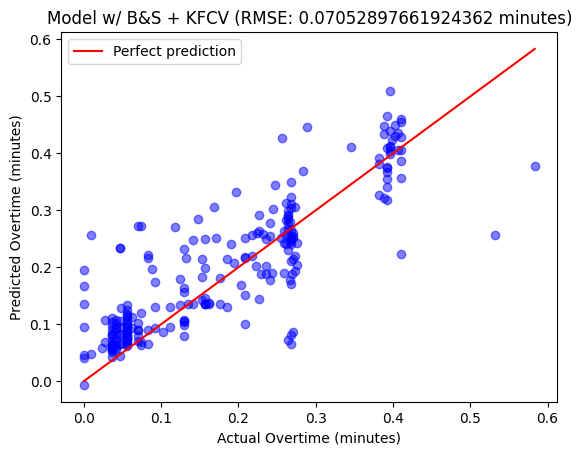

In [162]:
plt.scatter(kfcv_y_test_denormalized, kfcv_test_scores_denormalized, alpha=0.5, color='blue')
plt.plot([min(kfcv_y_test_denormalized), max(kfcv_y_test_denormalized)], [min(kfcv_y_test_denormalized), max(kfcv_y_test_denormalized)], color='red', label='Perfect prediction')
plt.xlabel('Actual Overtime (minutes)')
plt.ylabel('Predicted Overtime (minutes)')
plt.title(f'Model w/ B&S + KFCV (RMSE: {kfcv_rmse_denormalized[0,0]} minutes)') # used the index so it wouldn't be inside square brackets
plt.legend()
plt.show()

**Final visualization of improvements**

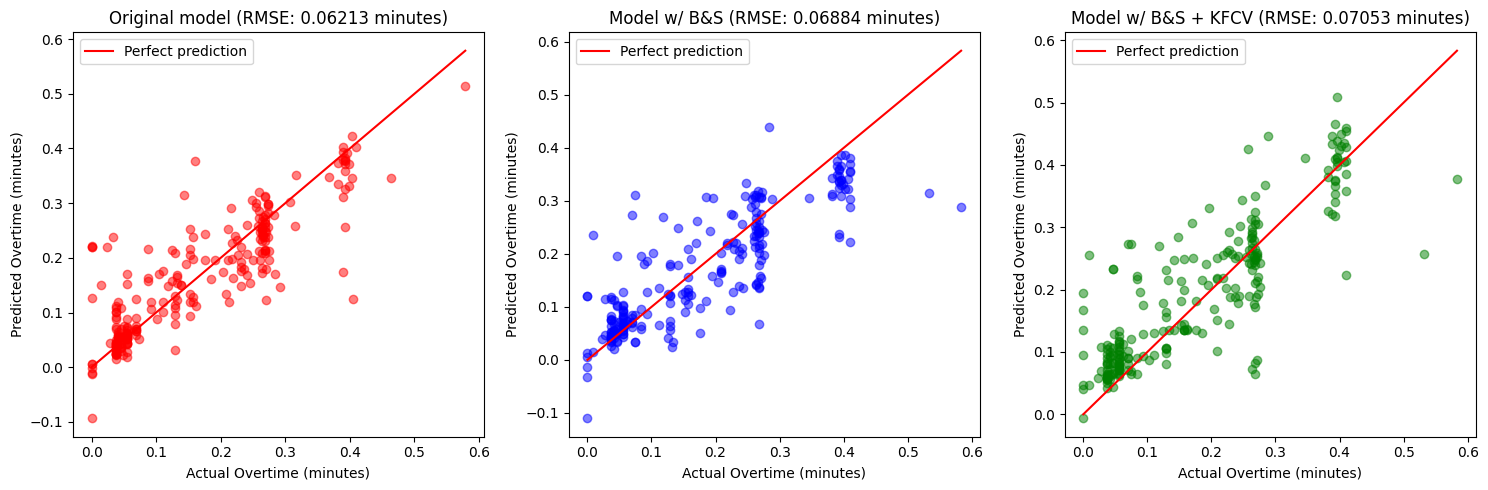

In [163]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# First plot - original
axs[0].scatter(y_test_denormalized, test_scores_denormalized, alpha=0.5, color='red')
axs[0].plot([min(y_test_denormalized), max(y_test_denormalized)], 
            [min(y_test_denormalized), max(y_test_denormalized)], 
            color='red', label='Perfect prediction')
axs[0].set_xlabel('Actual Overtime (minutes)')
axs[0].set_ylabel('Predicted Overtime (minutes)')
axs[0].set_title(f'Original model (RMSE: {rmse_denormalized[0,0]:.5f} minutes)')
axs[0].legend()

# Second plot - B&S
axs[1].scatter(bs_y_test_denormalized, bs_test_scores_denormalized, alpha=0.5, color='blue')
axs[1].plot([min(bs_y_test_denormalized), max(bs_y_test_denormalized)], 
            [min(bs_y_test_denormalized), max(bs_y_test_denormalized)], 
            color='red', label='Perfect prediction')
axs[1].set_xlabel('Actual Overtime (minutes)')
axs[1].set_ylabel('Predicted Overtime (minutes)')
axs[1].set_title(f'Model w/ B&S (RMSE: {bs_rmse_denormalized[0,0]:.5f} minutes)')
axs[1].legend()

# Third plot - KFCV
axs[2].scatter(kfcv_y_test_denormalized, kfcv_test_scores_denormalized, alpha=0.5, color='green')
axs[2].plot([min(kfcv_y_test_denormalized), max(kfcv_y_test_denormalized)], 
            [min(kfcv_y_test_denormalized), max(kfcv_y_test_denormalized)], 
            color='red', label='Perfect prediction')
axs[2].set_xlabel('Actual Overtime (minutes)')
axs[2].set_ylabel('Predicted Overtime (minutes)')
axs[2].set_title(f'Model w/ B&S + KFCV (RMSE: {kfcv_rmse_denormalized[0,0]:.5f} minutes)')
axs[2].legend()

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()

Sir's advice
1. Use all features (features that are not correlated on their own might have some sense when combined with others)
2. Consider not normalizing the target AKA over_time
3. Since loss is so small, let's look at it as percentage decrease per iteration

Possible improvements:

1. Bin and stratify when doing train-test-val split **[DONE]**
2. Change the split ratios or just use train-test with k-fold validation instead of having a validation set **[DONE]**
3. Patience mechanism in the training?

# [MODEL 3] Predicting overtime using a Decision Tree (Taro)

In [164]:
df['categorical_over_time'] = df['unscalled_over_time']//60

In this section, we will be predicting over_time using two types of decision trees, regressor and classifier, which will be explained later on as to why two were used. 
Since the other models we used were Linear Regression and Neural Networks, the remaining most appropriate model for this task is a Decision Tree. We cannot use Logistic Regression and Naive Bayes since we are not classifying anything here. KNN could be but the data we have has too much features so it could be too complicated for it

"Let us first import all the needed modules." - Matt

In [165]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn import preprocessing   

Preparing the other functions we need, describe tree is simply just used to visualize our tree, while the other functions are for loss or accuracy computations

In [166]:
def compute_mse(predictions, actual):
    return np.square(predictions-actual).mean()

def compute_accuracy(predictions, actual):
    return sum(predictions==actual)/len(actual) * 100

def describe_tree(clf):
    n_nodes = clf.tree_.node_count
    children_left = clf.tree_.children_left
    children_right = clf.tree_.children_right
    feature = clf.tree_.feature
    threshold = clf.tree_.threshold
    values = clf.tree_.value

    node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
    is_leaves = np.zeros(shape=n_nodes, dtype=bool)
    stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
    while len(stack) > 0:
        # `pop` ensures each node is only visited once
        node_id, depth = stack.pop()
        node_depth[node_id] = depth

        # If the left and right child of a node is not the same we have a split
        # node
        is_split_node = children_left[node_id] != children_right[node_id]
        # If a split node, append left and right children and depth to `stack`
        # so we can loop through them
        if is_split_node:
            stack.append((children_left[node_id], depth + 1))
            stack.append((children_right[node_id], depth + 1))
        else:
            is_leaves[node_id] = True

    print(
        "The binary tree structure has {n} nodes and has "
        "the following tree structure:\n".format(n=n_nodes)
    )
    for i in range(n_nodes):
        if is_leaves[i]:
            print(
                "{space}node={node} is a leaf node, values: {values}.".format(
                    space=node_depth[i] * "\t", node=i, values=values[i]
                )
            )
        else:
            print(
                "{space}node={node} is a split node: "
                "go to node {left} if X[:, {feature}] <= {threshold} "
                "else to node {right}.".format(
                    space=node_depth[i] * "\t",
                    node=i,
                    left=children_left[i],
                    feature=feature[i],
                    threshold=threshold[i],
                    right=children_right[i],
                )
            )

**Data preparation**

In [167]:
df.keys()

Index(['quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv',
       'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity',
       'unscalled_over_time', 'month', 'workers_per_smv', 'z_score',
       'categorical_over_time'],
      dtype='object')

Filtering the features considered what could possibly affect overtime and why? </br>
<ul>
    <li>Quarter - It could be possible that some quarters may have trickier situations like cold weather or such which could affect productivity, thus overtime</li>
    <li>Department - Some departments could have better working conditions or synergy which could affect productivity, thus overtime</li>
    <li>Team - Some teams could work better with each other which could affect productivity, thus overtime </li>
    <li>Targeted_productivity - The targeted productivity for the shift which they have to achieve, obviously if they cannot attain this, then they have to overtime </li>
    <li>Smv - The ammount of time it takes to finish a task</li>
    <li>Wip - How many is left unfinished which they have to finish</li>
    <li>Incentive - Motivation for workers to work faster which could affect productivity, thus overtime</li>
    <li>Idle_time - The time production goes idle which could affect productivity, thus overtime</li>
    <li>Idle_men - The ammount of men that goes idle which could affect productivity, thus overtime</li>
    <li>No_of_workers - Number of workers working on the task</li>
    <li>Actual_productivity - <strike>which could affect productivity, thus overtime...</strike> Joke lng </li>
    <li>Actual_productivity - The actual productivity that was finished for the shift </li>
    <li>Month - The month which could affect the productivity requirement when products are in season</li>
    <li>Worker_per_smv - How many workers are working on a certain task</li>
</ul>


In [168]:
dt_df = df.iloc[:,[
                0, #quarter
                1, #department
#                2, #day
                3, #team
                4, #targeted_productivity
                5, #smv
                6, #wip
                8, #incentive
                9, #idle_time
                10, #idle_men
#                11, #no_of_style_change
                12, #no_of_workers
                13, #actual_productivity
                15, #month
                16, #worker_per_smv

#                7 #over_time
#                14 #unscalled_over_time
                18 #categorical_over_time
                ]]

for i in range(len(dt_df.keys())):
    print(f'{str(i) + " : " + dt_df.keys()[i]}')


0 : quarter
1 : department
2 : team
3 : targeted_productivity
4 : smv
5 : wip
6 : incentive
7 : idle_time
8 : idle_men
9 : no_of_workers
10 : actual_productivity
11 : month
12 : workers_per_smv
13 : categorical_over_time


Since the data technically has features that are not in numbers, we have to change them into number representation via Label Encoding

In [169]:
label_enc = preprocessing.LabelEncoder()
label_enc.fit(dt_df["department"])
label_enc.transform(dt_df["department"])

print("Original labels:", label_enc.classes_, "\n")

print("Mapping from nominal to numerical labels:")
print(dict(zip(label_enc.classes_,label_enc.transform(label_enc.classes_))))

dt_df["department"] = label_enc.transform(dt_df["department"])

label_enc = preprocessing.LabelEncoder()
label_enc.fit(dt_df["quarter"])
label_enc.transform(dt_df["quarter"])

print("Original labels:", label_enc.classes_, "\n")

print("Mapping from nominal to numerical labels:")
print(dict(zip(label_enc.classes_,label_enc.transform(label_enc.classes_))))

dt_df["quarter"] = label_enc.transform(dt_df["quarter"])

Original labels: ['finishing' 'sweing'] 

Mapping from nominal to numerical labels:
{'finishing': 0, 'sweing': 1}
Original labels: ['Quarter1' 'Quarter2' 'Quarter3' 'Quarter4' 'Quarter5'] 

Mapping from nominal to numerical labels:
{'Quarter1': 0, 'Quarter2': 1, 'Quarter3': 2, 'Quarter4': 3, 'Quarter5': 4}


C:\Users\user\AppData\Local\Temp\ipykernel_17496\3758681289.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_df["department"] = label_enc.transform(dt_df["department"])
C:\Users\user\AppData\Local\Temp\ipykernel_17496\3758681289.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_df["quarter"] = label_enc.transform(dt_df["quarter"])


We now divide the dataframe to X and y where all features except the last column is moved to X while the last column goes to y, which is the label we are trying to predict

In [170]:
X = dt_df.values[:,:-1]
y = dt_df.values[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

print("X_train shape : ", X_train.shape)
print("y_train shape : ", y_train.shape)
print("X_test shape : ", X_test.shape)
print("y_test shape : ", y_test.shape)

X_train shape :  (837, 13)
y_train shape :  (837,)
X_test shape :  (360, 13)
y_test shape :  (360,)


# For this model, we will try to experiment with both Regressor and Classifier Decision Trees. Why the need to try both?

Initially I have tried to do the task in Regression only since it is a numerical data but it had encountered many problems with limitations of what it could predict to certain values only which is also affected by the max leaf nodes. Since in regression, the model does not have a formula, it will simply divide the data and take the average for the prediction which when having only n leaf nodes means that the max variations of values it predicts will only be n. </br>
Why classifier? Well... when we assume the data to be classification task, it can technically reach more values in its predictions. The problem though with Classification is that when it does not hit, it really just does not hit properly. What I mean by this is that the value it predicts may be the exact amount of hours in overtime or a value far from it. It does not consider a mathematical sense when predicting unlike the Regressor.

We remove the hyperparameter to the Max Leaf Nodes since the range of the values is too large, having the max leaf node will limit the tree's prediction to only some set of values.

In [171]:
dtr = DecisionTreeRegressor(criterion='squared_error')

hyperparameters = [
    {
        'min_impurity_decrease': [0.001,0.01,0.05,0.1,0.3,0.5],
        'max_depth': [20,30,40,50],
        'min_samples_split': [2,4,6,10,15,20],
    }
]

rsr = RandomizedSearchCV(estimator=dtr, param_distributions=hyperparameters, n_iter=50, cv=5, random_state=42, scoring='neg_mean_squared_error',)

rsr.fit(X_train, y_train)

rsr.best_params_

{'min_samples_split': 20, 'min_impurity_decrease': 0.01, 'max_depth': 20}

For classification, we can keep the max leaf nodes since technically our data is assumed to be categorical and not mathematical, therefore the predictions it will make can be of any of the "classes" of numbers defined for overtime

In [172]:
dtc = DecisionTreeClassifier()

hyperparameters = [
    {
        'criterion' : ['gini','entropy'],
        'max_depth': [10,20,30,40,50],
        'min_samples_split': [2,4,6,10,15,20],
        'max_leaf_nodes': [3,5,10,20,50,100,200],
    }
]

rsc = RandomizedSearchCV(estimator=dtc, param_distributions=hyperparameters, n_iter=50, cv=5, random_state=42)

rsc.fit(X_train, y_train)

rsc.best_params_

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


{'min_samples_split': 2,
 'max_leaf_nodes': 100,
 'max_depth': 20,
 'criterion': 'gini'}

In [173]:
dtr = rsr.best_estimator_

dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=20, min_impurity_decrease=0.01,
                      min_samples_split=20)

In [174]:
dtc = rsc.best_estimator_

dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, max_leaf_nodes=100)

In [175]:
predictions_train_r = dtr.predict(X_train)
predictions_train_c = dtc.predict(X_train)

print("MSE: ", compute_mse(predictions_train_r, y_train))
print("MSE: ", compute_mse(predictions_train_c, y_train))
print("ACC: ", compute_accuracy(predictions_train_c, y_train))
predictions_train_m = np.add(predictions_train_r, predictions_train_c)/2
print("MSE: ", compute_mse(predictions_train_m, y_train))

predictions_train_df = pd.DataFrame({'true' : y_train, 'pred_r' : predictions_train_r, 'pred_c' : predictions_train_c, 'pred_m' : predictions_train_m})
predictions_train_df

MSE:  478.017580550013
MSE:  1068.2879330943847
ACC:  71.92353643966547
MSE:  578.3770911037088


,true,pred_r,pred_c,pred_m
0,104.0,98.200000,104.0,101.100000
1,171.0,172.117647,171.0,171.558824
2,177.0,179.100000,177.0,178.050000
3,171.0,168.611111,171.0,169.805556
4,116.0,116.125000,116.0,116.062500
...,...,...,...,...
832,114.0,100.666667,114.0,107.333333
833,116.0,113.416667,116.0,114.708333
834,76.0,71.500000,94.0,82.750000
835,112.0,111.800000,112.0,111.900000


In [176]:
predictions_test_r = dtr.predict(X_test)
predictions_test_c = dtc.predict(X_test)

print("Regressor MSE: ", compute_mse(predictions_test_r, y_test))
print("Classifier MSE: ", compute_mse(predictions_test_c, y_test))
print("ACC: ", compute_accuracy(predictions_test_c, y_test))
predictions_test_m = np.add(predictions_test_r, predictions_test_c)/2
print("Mean MSE: ", compute_mse(predictions_test_m, y_test))

predictions_test_df = pd.DataFrame({'true' : y_test, 'pred_r' : predictions_test_r, 'pred_c' : predictions_test_c, 'pred_m' : predictions_test_m})
predictions_test_df

Regressor MSE:  998.9707641894848
Classifier MSE:  1548.486111111111
ACC:  51.94444444444445
Mean MSE:  897.0584077814144


,true,pred_r,pred_c,pred_m
0,68.0,67.600000,68.0,67.800000
1,44.0,45.333333,90.0,67.666667
2,30.0,34.000000,30.0,32.000000
3,16.0,16.000000,16.0,16.000000
4,38.0,38.666667,165.0,101.833333
...,...,...,...,...
355,171.0,172.117647,171.0,171.558824
356,116.0,179.100000,174.0,176.550000
357,85.0,174.300000,171.0,172.650000
358,114.0,115.333333,114.0,114.666667


Finally, we took the mean of the results which will be explained later on. For the data itself, we can see that regressor generally does better than classifier so why do we need to do the classifier then?

The main reason is since there are instances that regressor predicts too far or because of the limitations of the values it can predict to certain numbers, regressor may have a further prediction than classifier. As for classifier, for atleast 50% of the instances, it hits the "class" properly and exact but some instances predicted are far from the right answer. To solve both problems, we take the mean of the two which for some cases could do worse than regressor, but sometimes can do better when regressor is making too much mistakes like in test sets that it did not fit on. Decision trees try to overfit the data as much as it can so when it comes to the test set, there could be bigger errors. With this, the errors from the regressor model could be cancelled out even by a bit with the classifier model and vice versa, which could possibly lead to a lower error. 

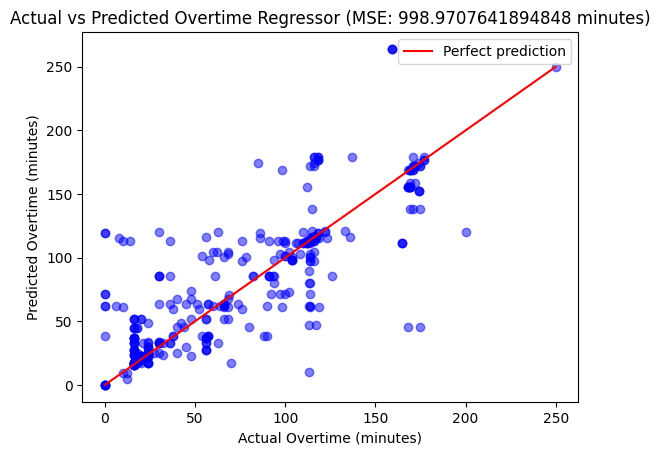

In [177]:
plt.scatter(y_test, predictions_test_r, alpha=0.5, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Perfect prediction')
plt.xlabel('Actual Overtime (minutes)')
plt.ylabel('Predicted Overtime (minutes)')
plt.title(f'Actual vs Predicted Overtime Regressor (MSE: {compute_mse(predictions_test_r, y_test)} minutes)') # used the index so it wouldn't be inside square brackets
plt.legend()
plt.show()

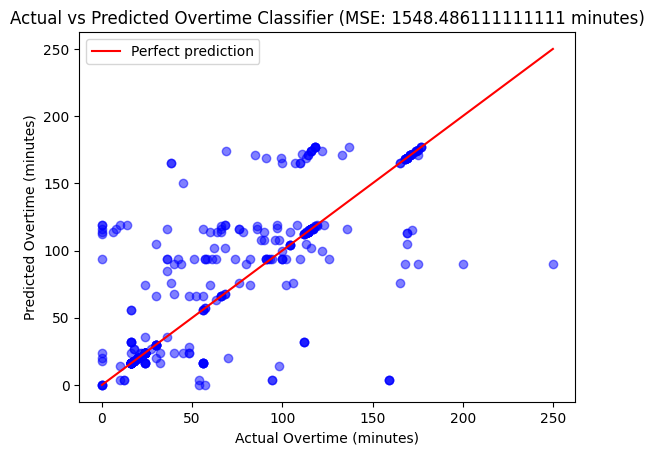

In [178]:
plt.scatter(y_test, predictions_test_c, alpha=0.5, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Perfect prediction')
plt.xlabel('Actual Overtime (minutes)')
plt.ylabel('Predicted Overtime (minutes)')
plt.title(f'Actual vs Predicted Overtime Classifier (MSE: {compute_mse(predictions_test_c, y_test)} minutes)') # used the index so it wouldn't be inside square brackets
plt.legend()
plt.show()

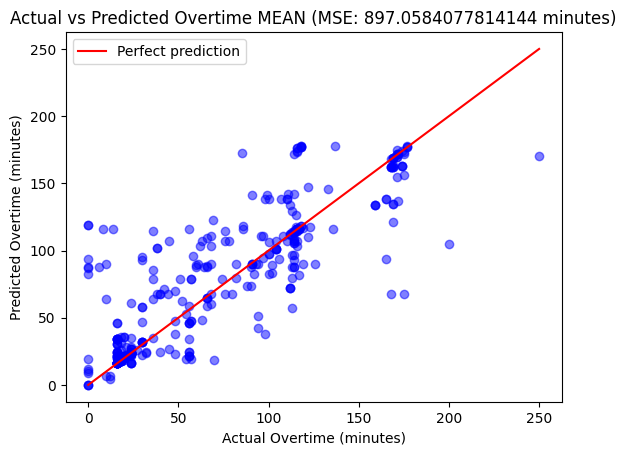

In [179]:
plt.scatter(y_test, predictions_test_m, alpha=0.5, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Perfect prediction')
plt.xlabel('Actual Overtime (minutes)')
plt.ylabel('Predicted Overtime (minutes)')
plt.title(f'Actual vs Predicted Overtime MEAN (MSE: {compute_mse(predictions_test_m, y_test)} minutes)') # used the index so it wouldn't be inside square brackets
plt.legend()
plt.show()

**Concept of the model**

Though even when combining the results from the classifier and regressor, it technically only improved it a bit, it could also be possible that it makes it worse

Assuming the best case scenario where our classifier hits 100%, the overall loss of the model will be reduced significantly to around 1/4 of the loss of the regressor model since when taking the mean, technically we are averaging the prediction of the regressor with the prediction of the classifier which when in 100% accuracy essentially mean the actual value

$$
\frac{1}{n}\sum^n_{i=1}(\frac{y_i+\hat{y}_i}{2}-\hat{y}_i)^2 \\
=\frac{1}{n}\sum^n_{i=1}(\frac{y_i-\hat{y}_i}{2})^2 \\
=\frac{1}{4}\frac{1}{n}\sum^n_{i=1}(y_i-\hat{y}_i)^2 \\
$$ 

Assuming the worst case scenario where our classfier hits 0%. the overall loss of the model will be increased by some random value it determined within the range of possible values and not outside that range since classification model assumes the number as a class and does not determine it mathematically, therefore it cannot reach any value that is not part of the "class". For the loss itself, it will also be balanced out by our regressor model since the regressor model does have mathematical reasoning behind it's computations, therefore predicts somewhat near to the actual value. Combining both though would still give us a worse loss than the regressor model itself, but surely better than the classifier model

$$\frac{1}{n}\sum^n_{i=1}(\frac{y_{ir}+y_{ic}}{2}-\hat{y}_i)^2$$

When we assume say an average scenario where our classifier hits around 50% of the data, we know that for half of the data, it would follow the 1st formula, while half would follow the 2nd formula

$$\frac{1}{4}\frac{1}{l}\sum^l_{i=1}(y_{ir}-\hat{y}_i)^2 + \frac{1}{m}\sum^m_{i=1}(\frac{y_{ir}+y_{ic}}{2}-\hat{y}_i)^2 \\
where\;n = l + m \\ 
l\;is\;n*acc \\
m\;is\;n*(1-acc)$$

Essentially combining the regressor model and the classifier model together gives us this formula where the new loss is now dependent to the accuracy of the classifier model. Technically in some sense, it is a gamble since like I've said above, it could possibly lead to lower loss, it is no guarantee, but Decision Trees by itself is already a gamble because the datasets we have, commonly don't have a proper pattern or can't be explained with mathematical proof. 

Overall the concept of this is...</br>
<strike>"If madami kang bobo na mga models, pano ka makakapagpredict ng maayos? You make them work together, ang maraming bobo, pag pinagsamasama, magiging matalino" - Dr. Thomas Tiam-Lee, 2024</strike></br>
May dalawa kang matalino, pero di naman sila perpekto, nagkakamali sila sa iba-ibang bagay pero hindi sa parehong bagay sila nagkakamali so kaya nilang turuan yung isa't isa sa mga bagay na mali yung isa para mas maging matalino

**Improvement of the model**

Generally, decision trees don't seem to be a good model to deal with regression related problems since there are other models more capable like Linear Regression or Neural Networks or etc.... But it isn't fully incapable of doing the task. The problem doesnt rely much on whatever features you use since technically it will find the "best" question it could ask to divide the data. Sure the features may technically affect it, especially if you remove the important features, but technically adding some less important but still connected features doesn't hurt much. Think of it like their weights are very small but there is still some weight to it.

Sir's advice
1. Use all features (features that are not correlated on their own might have some sense when combined with others)
2. Consider not normalizing the target AKA over_time
3. Try to find and consider what else could limit the tree's capabilities

Possible improvements:
1. Experiment on other parameters of the Decision Tree
2. Try other concepts of ensemble learning related to trees and maybe it could improve the results

Don't Try!!!:
1. Use tree to check if the model should use the regressor results or the classifier results, it did not go well...
2. Give a limit for max_leaf_nodes on regression models, you are limitting the possible values it can predict